# Project Title: Movie Recommendation Algorithm

### Team JM5 members
- Thabani Dhladhla
- Lawryn Gwebu
- Dikeledi Choene
- Albina Hlongo

## Introduction

In the rapidly evolving landscape of today's technology-driven world, recommender systems have become pivotal in shaping our digital experiences. These systems play a crucial role in assisting individuals in making informed choices about the content they engage with on a daily basis. One particularly compelling application is in the realm of movie content recommendations, where intelligent algorithms have the potential to guide viewers through an overwhelming array of options and connect them with titles that align with their preferences.

### The Challenge:
In collaboration with EDSA, this project presents a unique challenge—to construct a recommendation algorithm that excels in predicting how a user will rate a movie they have not yet viewed. This prediction is to be based on the user's historical preferences, leveraging either content-based or collaborative filtering approaches. The ultimate goal is to create an accurate and robust solution that enhances the user experience by exposing them to content they are likely to enjoy, thus generating revenue and fostering platform affinity.

### Economic Potential:
Providing a precise solution to this challenge holds immense economic potential. A well-crafted recommendation algorithm not only enriches the user experience by offering tailored suggestions but also opens up opportunities for content creators and distributors to showcase their work to a receptive audience. The economic impact extends beyond user engagement, influencing purchasing decisions and building a stronger connection between users and the platform.

### Structure of the Notebook:

1. Data Exploration: Dive into the dataset to understand the features, patterns, and characteristics of the movie data.


2. Algorithm Selection: Choose between content-based and collaborative filtering approaches, and implement a recommendation algorithm tailored to the challenge.


3. Model Evaluation: Assess the accuracy and performance of the recommendation algorithm using appropriate metrics.


4. Economic Impact Analysis: Explore the potential economic impact of an effective recommendation system on user engagement, content consumption, and revenue generation.


5. Conclusion: Summarize key findings, discuss challenges encountered, and propose avenues for future enhancements.

## Dataset Description

### Data Overview
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!
For this Predict, we'll be using a special version of the MovieLens dataset which has been enriched with additional data, and resampled for fair evaluation purposes.


## Data Source

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

# 1. Importing packages

In [5]:
!pip install xgboost

In [130]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity

from scipy import sparse
from datetime import datetime
import os
import random
import gc
import xgboost as xgb

In [3]:
# Notebook parameter setting
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
plt.rcParams["figure.figsize"] = (25,5)

In [4]:
!pip install scikit-surprise

In [131]:
from scipy import sparse
from surprise import Reader, Dataset
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import SlopeOne
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds


## 2. Loading the Data


### Loading data

In [6]:
df_tags = pd.read_csv(r"C:\Users\27738\Music\2024 Predict\tags.csv")
df_movies = pd.read_csv(r"C:\Users\27738\Music\2024 Predict\movies.csv")
df_genome_scores = pd.read_csv(r"C:\Users\27738\Music\2024 Predict\genome_scores.csv")
df_imdb_data = pd.read_csv(r"C:\Users\27738\Music\2024 Predict\imdb_data.csv")

In [7]:
df_tags.head()
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

# Data Preprocessing

Converting timestamp format to Data time format

In [11]:
# Convert timestamps to datetime objects
Train_Data['timestamp'] = pd.to_datetime(Train_Data['timestamp'], unit='s')

# Shift timestamps by, for example, 7 days
days_to_shift = 7
Train_Data['timestamp'] = Train_Data['timestamp'] + pd.DateOffset(days=days_to_shift)

In [12]:
# Display the updated timestamps
print(Train_Data[['timestamp']])

                   timestamp
0        2018-02-18 11:53:12
1        2008-03-30 02:18:59
2        2004-02-15 04:45:39
3        2015-02-11 09:36:05
4        1996-06-05 13:17:17
...                      ...
10000033 2018-03-23 21:18:12
10000034 2001-10-15 22:42:57
10000035 2008-12-03 04:46:47
10000036 2016-11-30 17:18:50
10000037 1997-03-28 22:54:22

[10000038 rows x 1 columns]


- Time stamp has been successfully change to the correct Date time format

# Data Cleaning
We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.

In [36]:
# Checking for duplicates

print("No. of duplicates records in the dataset : ", df_tags.columns.duplicated().sum())

No. of duplicates records in the dataset :  0


Insights:
1. There are no duplicate records in the dataset.

In [37]:
# Checking the columns' titles and datatypes

df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


### Missing Values

Identifying the features that have some missing values and imputing them.

In [38]:
# Checking the number of missing values in data

df_tags.isna().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

Insights:

1. There are no missing values on the dataset

# Exploratory Data Anaylsis

We will now look at relationships and patterns on the dataset to help us understand the data better.

### Univariate Analysis

We will start with Univariate Analysis which is the concept of analyzing each feature individually to gain insights from the data and discover any outliers.

In [39]:
# Checking the feature "userID"

total_users = len(np.unique(df_tags["userId"]))
print("The count of unique userID in the dataset is : ", total_users)
print("The top 5 userID in the dataset are : \n", df_tags["userId"].value_counts()[:5])

The count of unique userID in the dataset is :  14592
The top 5 userID in the dataset are : 
 userId
6550      183356
21096      20317
62199      13700
160540     12076
155146     11445
Name: count, dtype: int64


Insights:

1. "userId" are the Users that were selected at random for inclusion and their ids have been anonymized.
2. There are 14K+ unique users in the dataset.
3. userId 6550 has around 183K records in the dataset.

In [40]:
# Checking the feature "movieID"

total_movies = len(np.unique(df_tags["movieId"]))
print("The count of unique movieID in the dataset is : ", total_movies)
print("The top 5 movieID in the dataset are : \n", df_tags["movieId"].value_counts()[:5])

The count of unique movieID in the dataset is :  45251
The top 5 movieID in the dataset are : 
 movieId
260       6180
79132     4767
296       4767
109487    3616
2959      3612
Name: count, dtype: int64


Insights:

1. "movieId" represents the movies with at least one rating or tag in the dataset.
2. There are close to 45K+ unique movies in the dataset.

In [41]:
# Checking the feature "date"
# leave it for now, I will check the code and issue of memory

print("The count of unique date in the dataset is : ", df_tags["timestamp"].nunique())
print("The first rating was given on : ", df_tags["timestamp"].min())
print("The latest rating was given on : ", df_tags["timestamp"].max())
print("The top 5 date in the dataset are : \n", df_tags["timestamp"].value_counts()[:5])

The count of unique date in the dataset is :  907730
The first rating was given on :  1135429210
The latest rating was given on :  1574316696
The top 5 date in the dataset are : 
 timestamp
1525965754    209
1525965755    204
1525965752    202
1525965756    178
1525965753    173
Name: count, dtype: int64


In [42]:
# Checking the feature "title"

movie_list = df_movies["title"].unique()
print("The count of unique title in the dataset is : ", df_movies["title"].nunique())
print("The top 5 title in the dataset are : \n", df_movies["title"].value_counts()[:5])

The count of unique title in the dataset is :  62325
The top 5 title in the dataset are : 
 title
The Void (2016)                                2
Seven Years Bad Luck (1921)                    2
Clear History (2013)                           2
Enron: The Smartest Guys in the Room (2005)    2
Deranged (2012)                                2
Name: count, dtype: int64


Observations:

1. There are 62K+ unique movie titles in the dataset.

In [43]:
# Extract unique Genres along with their count

unique_genres = {}

def ExtractGenres(x):
    for g in x.split("|"):
        if g not in unique_genres.keys():
            unique_genres[g] = 1
        else:
            unique_genres[g] = unique_genres[g] + 1

df_movies["genres"].apply(ExtractGenres)
print("Genres Extracted from the dataset.")

Genres Extracted from the dataset.


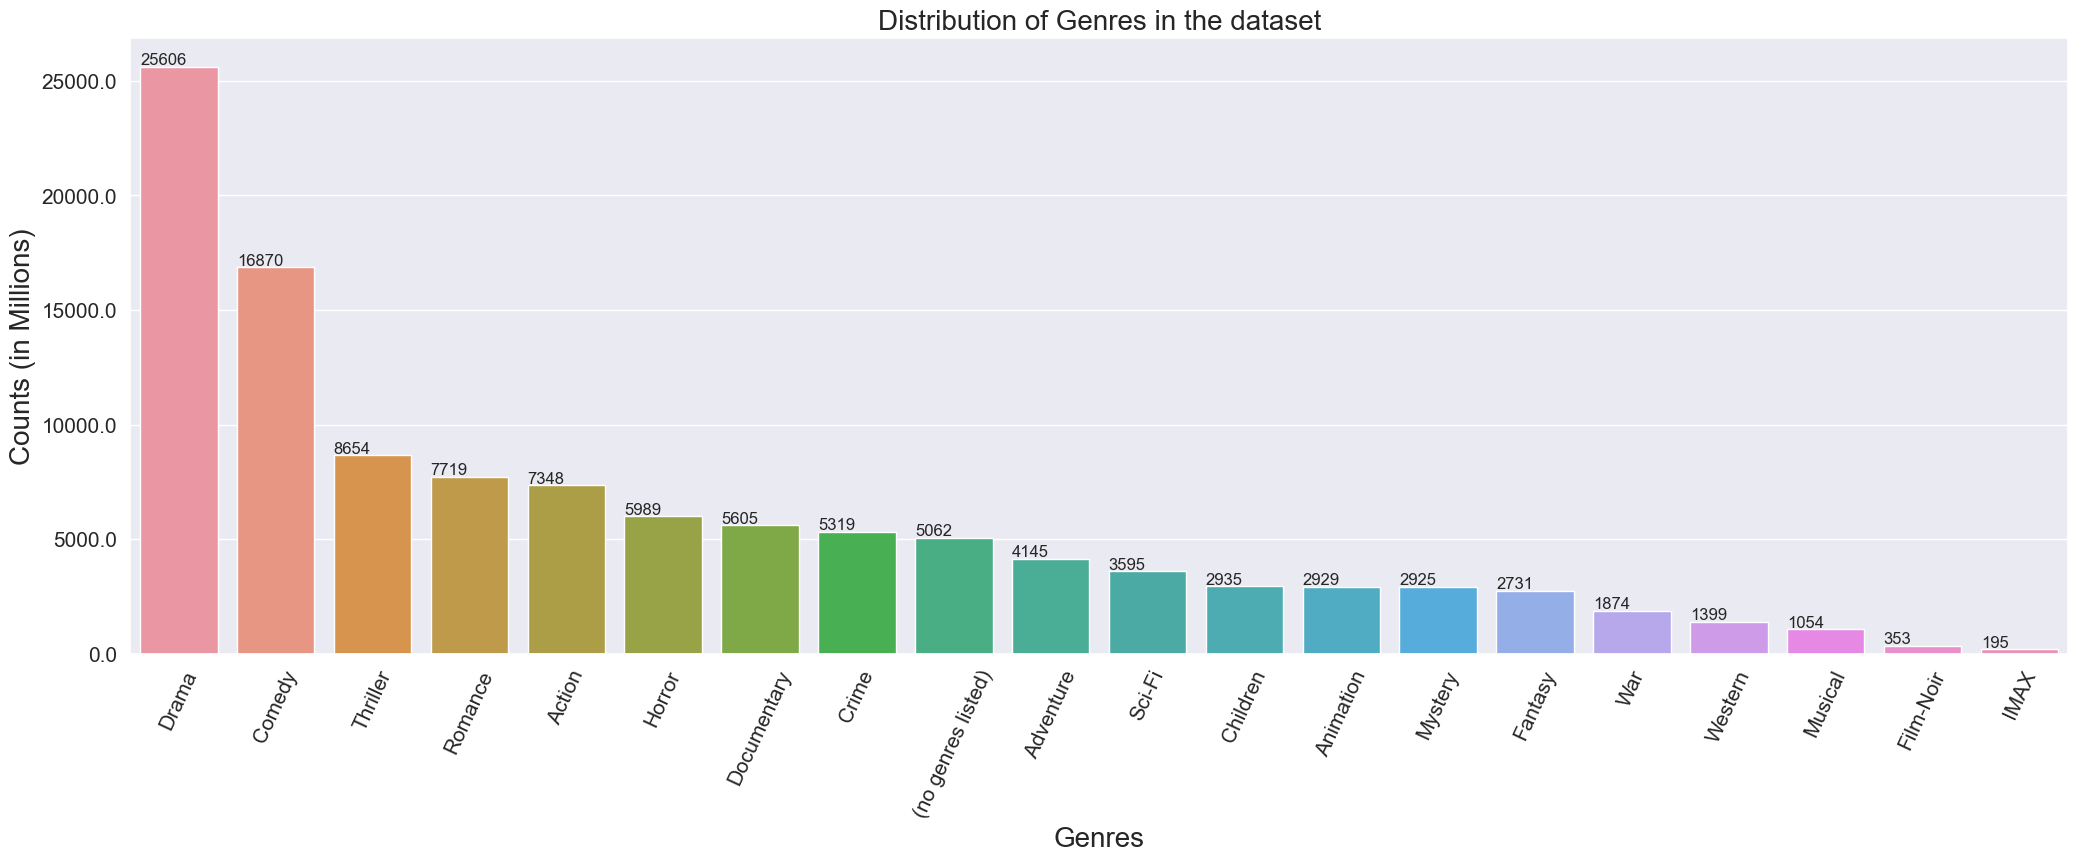

In [44]:
# Visualizing the feature "Genres"

genres_df = pd.DataFrame(list(unique_genres.items()))
genres_df.columns = ["Genre", "Count"] 

# Sort the genres_df DataFrame by Count in descending order
genres_df = genres_df.sort_values(by="Count", ascending=False)

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 8), sharey=True)

sns.barplot(y="Count", x="Genre", data=genres_df, ax=axes)
axes.set_yticklabels(num for num in axes.get_yticks())
for p in axes.patches:
    axes.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()+100))

plt.tick_params(labelsize=20)
plt.title("Distribution of Genres in the dataset", fontsize=20)
plt.xlabel("Genres", fontsize=20)
plt.xticks(rotation=65, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Counts (in Millions)", fontsize=20)
plt.show()


Insights:

1. There are 20 different genres of movies while there are few whose genre has not been mentioned.
2. Drama, Comedy, Thriller, Romance and Action are top 5 genres of movies present in the dataset.

In [45]:
df_tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

## Train/Test Data splitting
Train and Test Data has already been splitted.
We will load and head these datasets.

In [46]:
Train_Data = pd.read_csv(r"C:\Users\27738\Music\2024 Predict\train.csv")
Train_Data.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [47]:
Train_Data.shape

(10000038, 4)

In [48]:
Test_Data = pd.read_csv(r"C:\Users\27738\Music\2024 Predict\test.csv")
Test_Data.head()

userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

In [49]:
Test_Data.shape

(5000019, 2)

In [50]:
# Creating list of unique movies from Train Set

movie_list_in_training = Train_Data.drop_duplicates(subset=["userId"], keep="first")[["movieId", "userId", "rating"]]
movie_list_in_training = movie_list_in_training.reset_index(drop=True)
movie_list_in_training.head()

movieId  userId  rating
0    57669    5163     4.0
1        5  106343     4.5
2     5459  146790     5.0
3    32296  106362     2.0
4      366    9041     3.0

In [51]:
# Checking the basic statistics for the training data

print("Total Train Data..")
print("Total number of movie ratings in train data : ", str(Train_Data.shape[0]))
print("Number of unique users in train data : ", str(len(np.unique(Train_Data["userId"]))))
print("Number of unique movies in train data : ", str(len(np.unique(Train_Data["movieId"]))))

Total Train Data..
Total number of movie ratings in train data :  10000038
Number of unique users in train data :  162541
Number of unique movies in train data :  48213


### Bi-variate Analysis

Analyzing multiple features together to discover relations, correlations and patterns. 

#### Anaylzing the distribution of ratings

In [52]:
# Checking basic statistics for "rating"

print("The basic statistics for the feature is : \n", Train_Data["rating"].describe())

The basic statistics for the feature is : 
 count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [60]:
def ratings_distplot(df, column='rating'):
    plt.figure(figsize=(8,6))
    ax = sns.distplot(df[column], bins=10, kde=False, hist_kws=dict(alpha=0.6), color="#4D17A0")
    mean = df[column].mean()
    median = df[column].median()
    plt.axvline(x=mean, label=f'mean {round(mean,2)}', color='#4D17A0', lw=3, ls='--')
    plt.axvline(x=median, label=f'median {median}', color='#4DA017', lw=3, ls='--')
    plt.xlim((0.5, 5))
    plt.ylim((0, 2500000))
    plt.title('Distribution of Ratings', fontsize=16)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

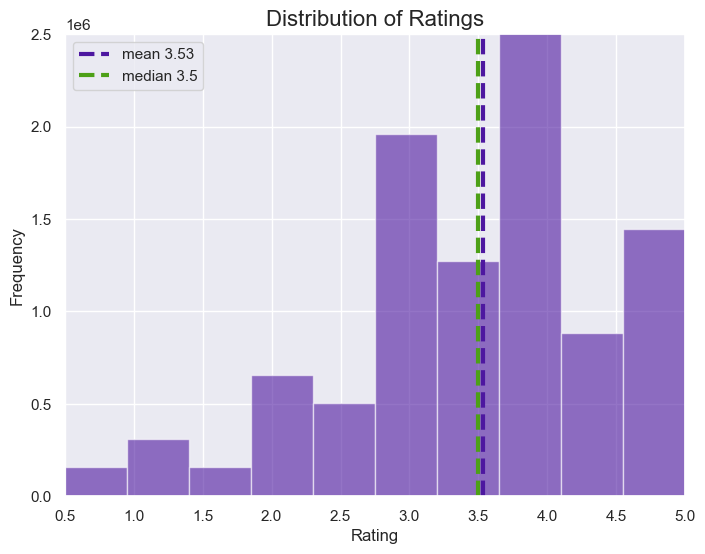

In [62]:
ratings_distplot(Train_Data)

insights:
 1. The mean and median value are very close to around 3.5
 2. The most common rating is 4.

### Analyzing the number of ratings with date.

In [33]:
# Extracting the day of week from the date when rating was provided

Train_Data["timestamp"] = pd.to_datetime(Train_Data["timestamp"], errors='coerce')
Train_Data["DayOfWeek"] = Train_Data["timestamp"].dt.strftime('%A')
Train_Data["Weekday"] = Train_Data["timestamp"].apply(lambda x : 1 if x.dayofweek > 5 else 0)

In [34]:
# Converting the number into 'Ks.

def ChangingLabelsInK(number):
    return str(int(number/10**3)) + "K"

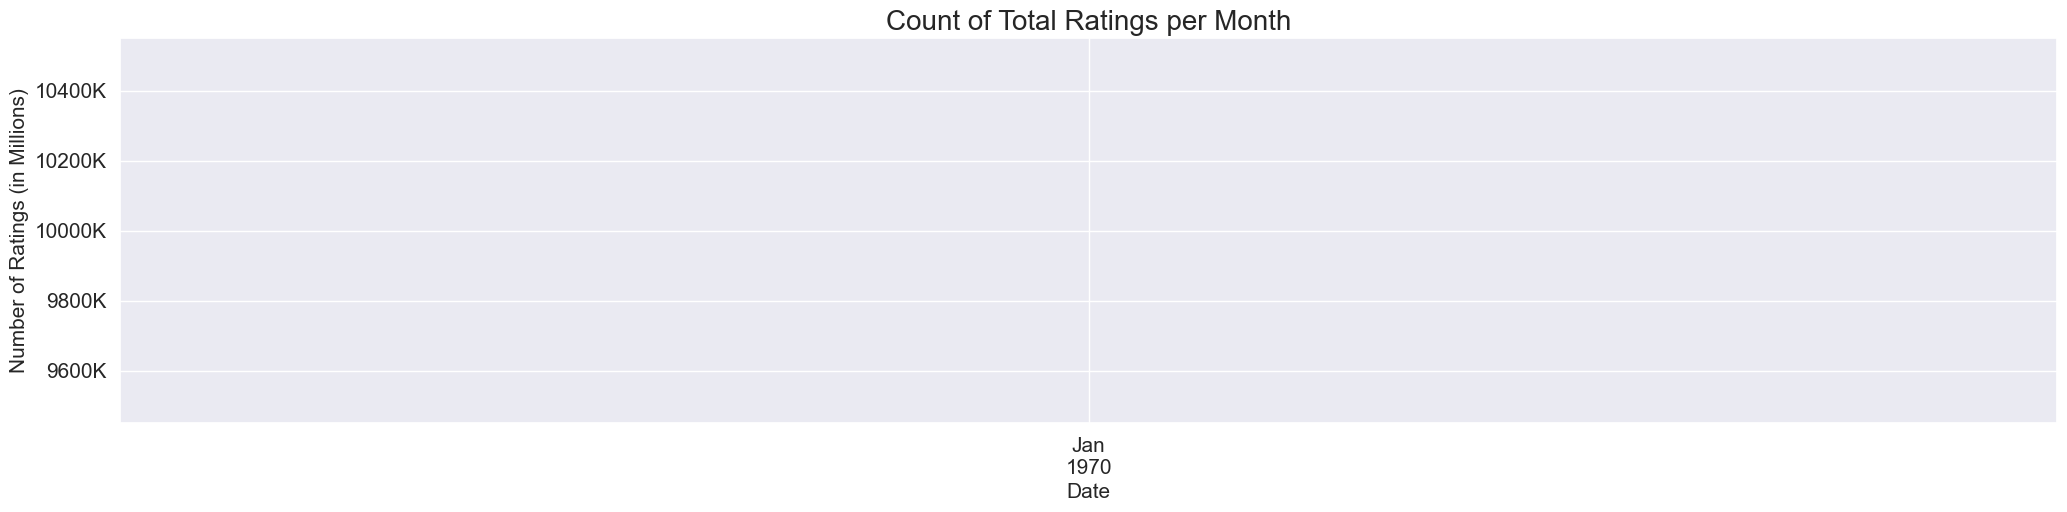

In [35]:
# Visualizing the count of total ratings made per month

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)
axes = Train_Data.resample("m", on = "timestamp")["rating"].count().plot()

axes.set_yticklabels([ChangingLabelsInK(num) for num in axes.get_yticks()])
axes.set_title("Count of Total Ratings per Month", fontsize = 20)
axes.set_xlabel("Date", fontsize = 15)
axes.set_ylabel("Number of Ratings (in Millions)", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

## Analyzing the Ratings given by Users.

In [33]:
# Calculating the number of ratings given by individual users

no_of_rated_movies_per_user = Train_Data.groupby(by=["userId"], as_index=False)["rating"].count().sort_values(by="rating", ascending=False)
no_of_rated_movies_per_user.reset_index(drop=True, inplace=True)

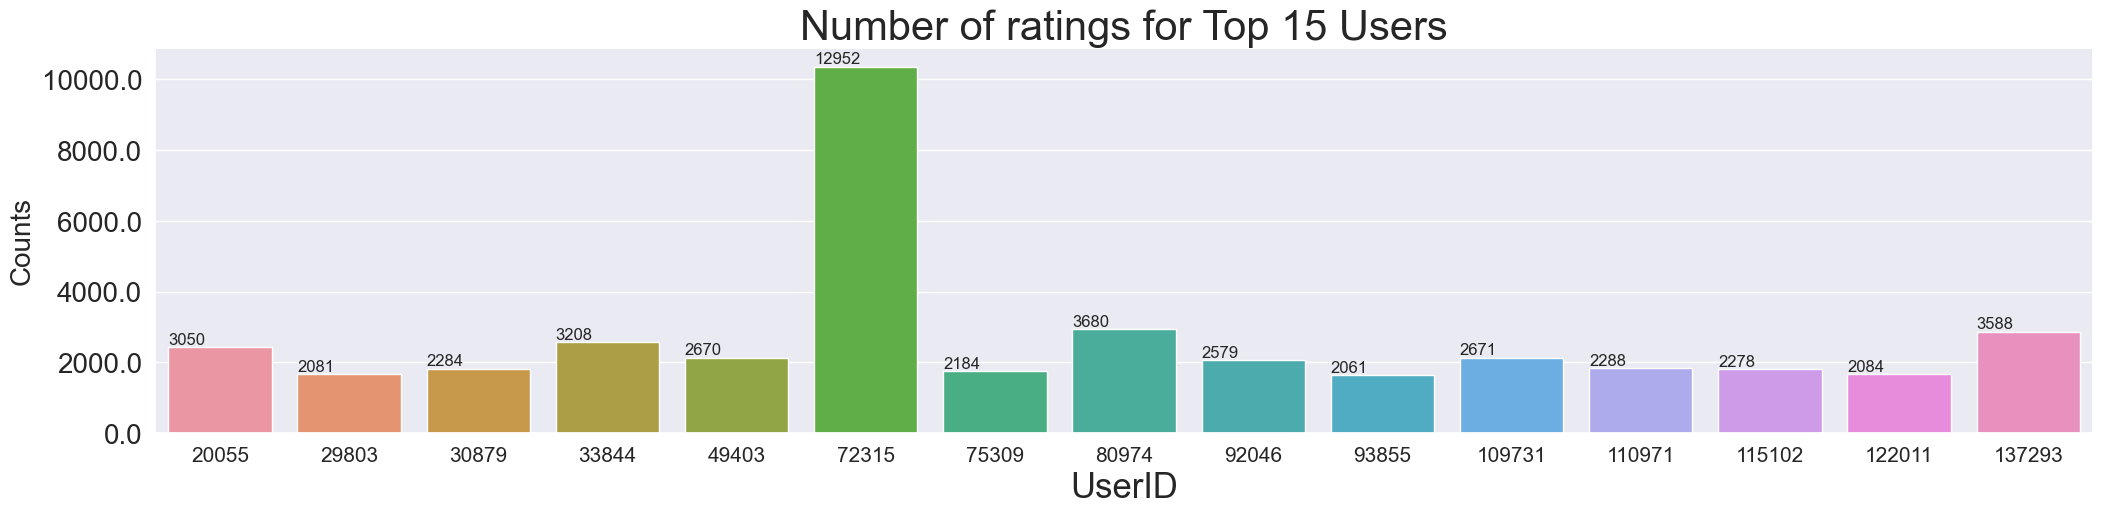

In [34]:
# Visualizing the count of ratings by individual users

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.barplot(x="userId", y="rating" , data=no_of_rated_movies_per_user[:15], ax=axes)
for p in axes.patches:
    axes.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()+100))

axes.set_yticklabels(num for num in axes.get_yticks())
plt.tick_params(labelsize = 20)
plt.title("Number of ratings for Top 15 Users", fontsize = 30)
plt.xlabel("UserID", fontsize = 25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.ylabel("Counts", fontsize = 20)
plt.show()

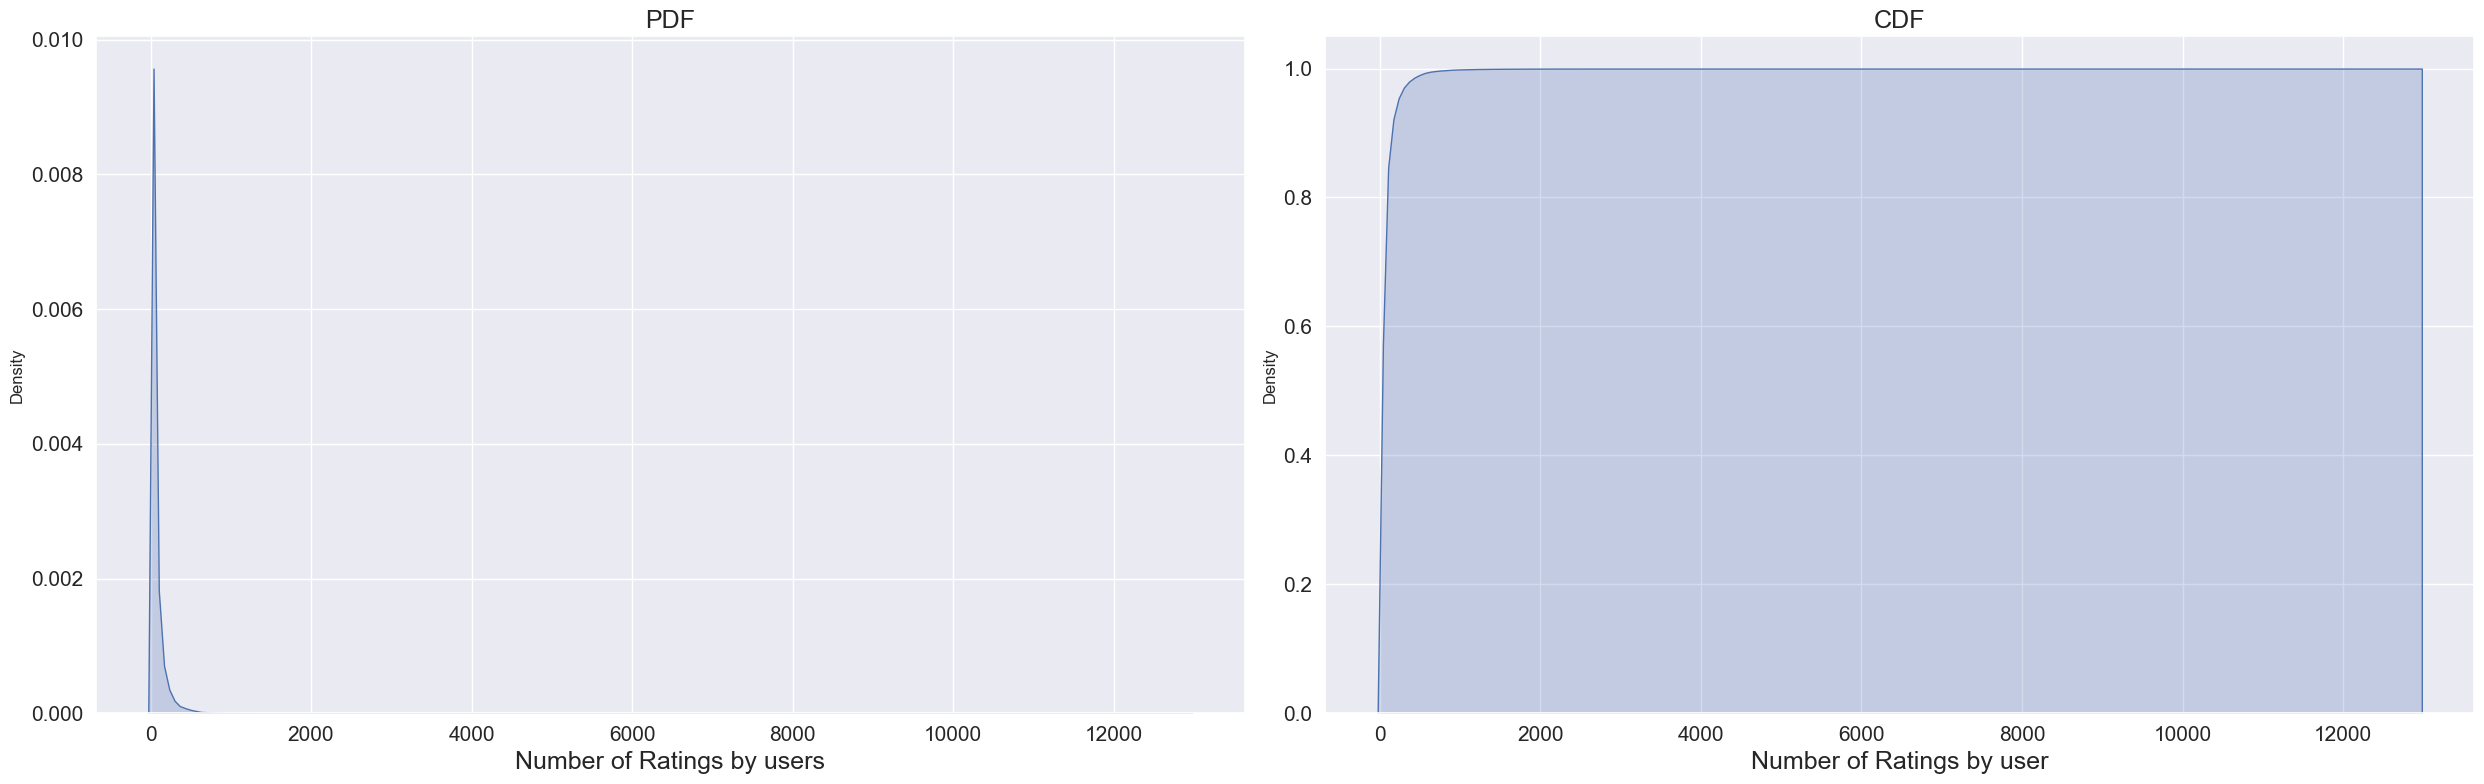

In [35]:
# Visualizing the count of ratings by individual users

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(25, 8))

sns.kdeplot(no_of_rated_movies_per_user["rating"], shade = True, ax = axes[0])
axes[0].set_title("PDF", fontsize = 18)
axes[0].set_xlabel("Number of Ratings by users", fontsize = 18)
axes[0].tick_params(labelsize = 15)

sns.kdeplot(no_of_rated_movies_per_user["rating"], shade = True, cumulative = True, ax = axes[1])
axes[1].set_title("CDF", fontsize = 18)
axes[1].set_xlabel("Number of Ratings by user", fontsize = 18)
axes[1].tick_params(labelsize = 15)

fig.subplots_adjust(wspace=2)
plt.tight_layout()
plt.show()

In [36]:
# Checking the basic statistics for the number of ratings per user

print("Information about no. of ratings by users : \n", no_of_rated_movies_per_user["rating"].describe())

Information about no. of ratings by users : 
 count    162541.000000
mean         61.523173
std         107.410889
min           1.000000
25%          14.000000
50%          28.000000
75%          65.000000
max       12952.000000
Name: rating, dtype: float64


In [37]:
quantiles = no_of_rated_movies_per_user["rating"].quantile(np.arange(0.9, 1.01,0.01))
qvalue = np.arange(0.9, 1.01,0.01)
for ctr in qvalue:
    print("The {}th quantile value is : {}".format(int(ctr*100), quantiles[ctr]))

The 90th quantile value is : 142.0
The 91th quantile value is : 153.0
The 92th quantile value is : 165.80000000001746
The 93th quantile value is : 180.0
The 94th quantile value is : 200.0
The 95th quantile value is : 222.0
The 96th quantile value is : 252.0
The 97th quantile value is : 295.0
The 98th quantile value is : 364.0
The 99th quantile value is : 491.6000000000058
The 100th quantile value is : 12952.0


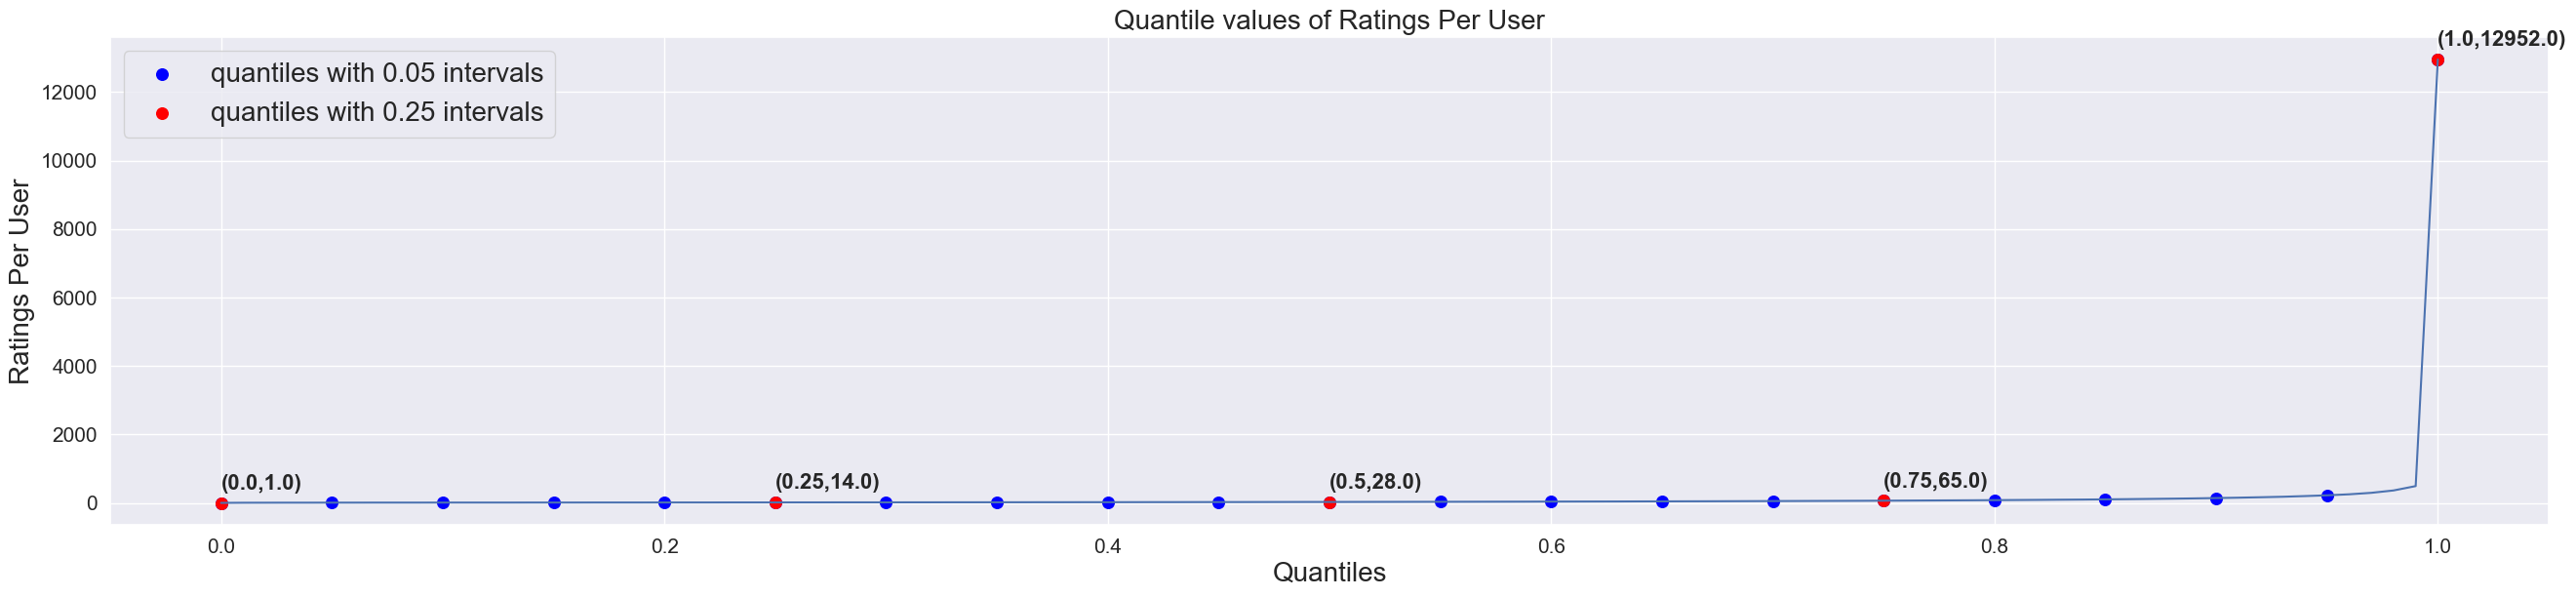

In [38]:
# Plotting the quantile values

quantiles = no_of_rated_movies_per_user["rating"].quantile(np.arange(0, 1.01,0.01))

fig = plt.figure(figsize = (25, 5))

axes = fig.add_axes([0.1,0.1,1,1])
axes.set_title("Quantile values of Ratings Per User", fontsize = 20)
axes.set_xlabel("Quantiles", fontsize = 20)
axes.set_ylabel("Ratings Per User", fontsize = 20)
axes.plot(quantiles)

plt.scatter(x = quantiles.index[::5], y = quantiles.values[::5], c = "blue", s = 70, label="quantiles with 0.05 intervals")
plt.scatter(x = quantiles.index[::25], y = quantiles.values[::25], c = "red", s = 70, label="quantiles with 0.25 intervals")
plt.legend(loc='upper left', fontsize=20)

for x, y in zip(quantiles.index[::25], quantiles.values[::25]):
    plt.annotate(text='({},{})'.format(x, y), xy=(x, y), textcoords='offset points', fontweight='bold', fontsize=16, xytext=(0, 10))

axes.tick_params(labelsize=15)
plt.show()


Observations:
 
1. The CDF graph shows that almost 99% of users give very few ratings.
2. The mean no. of ratings a user gives is 61.5 while the median is 28.
3. The no. of movies start to increase drastically from 90th percentile.

- Top 10 Rated Movies with over 10000 Ratings

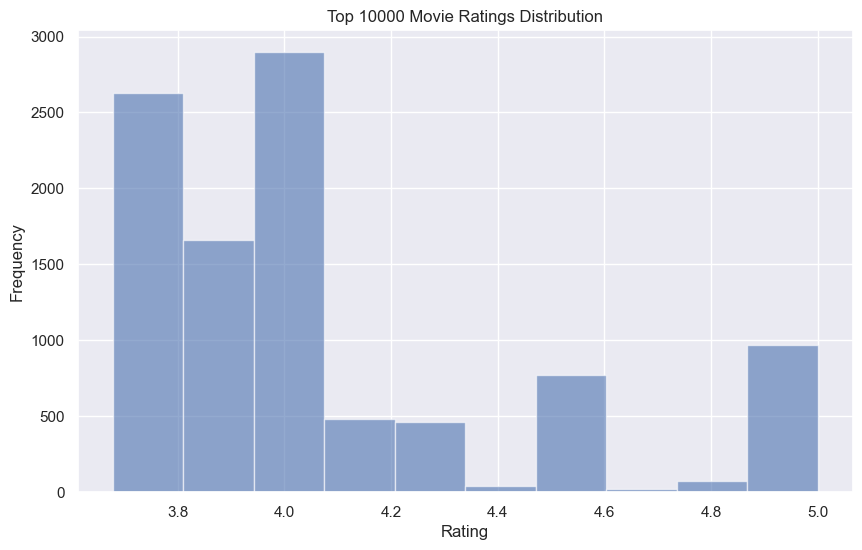

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_ratings(count, n, best, method, eda_df, df_movies):
    """
    Plot the ratings distribution graph.

    Parameters:
        count (int): Number of ratings to consider.
        n (int): Number of bins for the histogram.
        best (bool): If True, plot the best rating; otherwise, plot the average rating.
        method (str): Method for computing ratings ('mean' or 'median').
        eda_df (DataFrame): DataFrame containing rating data.
        df_movies (DataFrame): DataFrame containing movie data.

    Raises:
        ValueError: If eda_df or df_movies is None.

    Returns:
        None
    """
    if eda_df is None or df_movies is None:
        raise ValueError("eda_df and df_movies must be provided.")

    if method == 'mean':
        movie_avg_ratings = pd.DataFrame(eda_df.merge(df_movies, on='movieId', how='left', suffixes=('_eda', '_movies')).groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_avg_ratings = pd.DataFrame(eda_df.merge(df_movies, on='movieId', how='left', suffixes=('_eda', '_movies')).groupby(['movieId', 'title'])['rating'].median())

    plt.figure(figsize=(10, 6))
    if best:
        plt.hist(movie_avg_ratings['rating'].nlargest(count), bins=n, alpha=0.6, color='b')
        plt.title(f'Top {count} Movie Ratings Distribution' if method == 'mean' else f'Top {count} Movie Median Ratings Distribution')
    else:
        plt.hist(movie_avg_ratings['rating'], bins=n, alpha=0.6, color='b')
        plt.title(f'Movie Ratings Distribution' if method == 'mean' else f'Movie Median Ratings Distribution')
        
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


eda_df = Train_Data 
plot_ratings(10000, 10, True, 'mean', eda_df=eda_df, df_movies=df_movies)

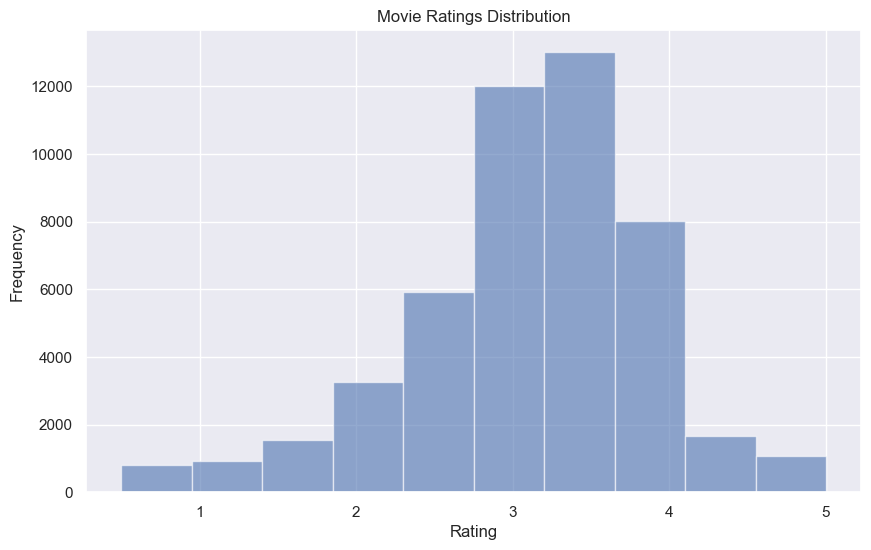

In [178]:
eda_df = Train_Data 
plot_ratings(10000, 10, best=False, method='mean', eda_df=eda_df, df_movies=df_movies)

### Analyzing the Ratings given to the Movies.

In [85]:
# Calculating count of ratings received for movies
no_of_ratings_per_movie = Train_Data.groupby(by = ["movieId"], as_index=False)["rating"].count().sort_values(by=["rating"], ascending = False)
no_of_ratings_per_movie = no_of_ratings_per_movie.reset_index(drop=True)


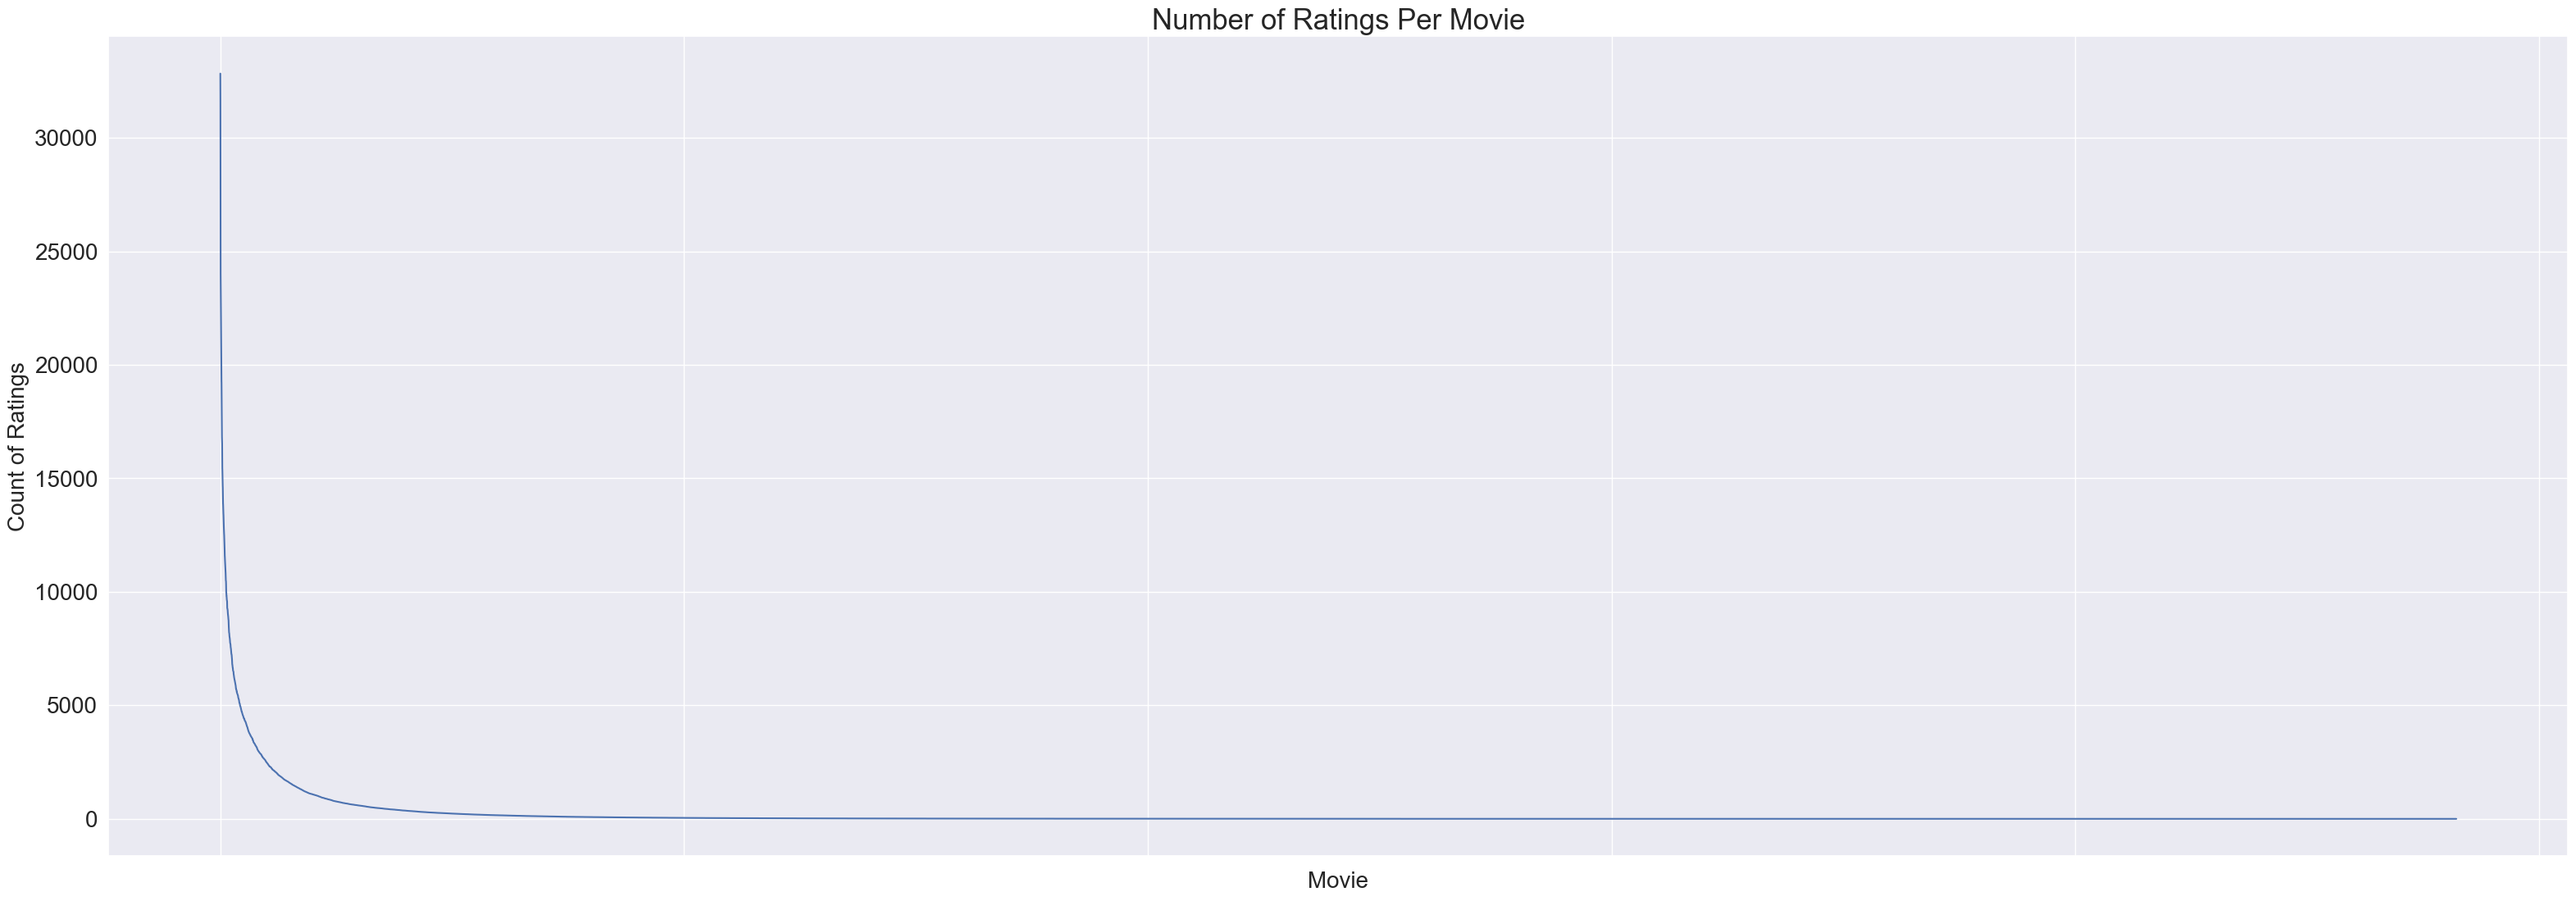

In [86]:
# Visualizing the number of ratings for the movies

sns.set(style="darkgrid")

fig = plt.figure(figsize = (30, 10))
axes = fig.add_axes([0.1, 0.1, 1, 1])
plt.title("Number of Ratings Per Movie", fontsize = 25)
plt.xlabel("Movie", fontsize = 20)
plt.ylabel("Count of Ratings", fontsize = 20)

plt.plot(no_of_ratings_per_movie["rating"].values)

plt.tick_params(labelsize = 20)
axes.set_xticklabels([])
plt.show()

Insights:

1. It is quite clear that there are some movies which are very popular and were rated by many users as comapared to other movies which has caused the plot to be right skewed.

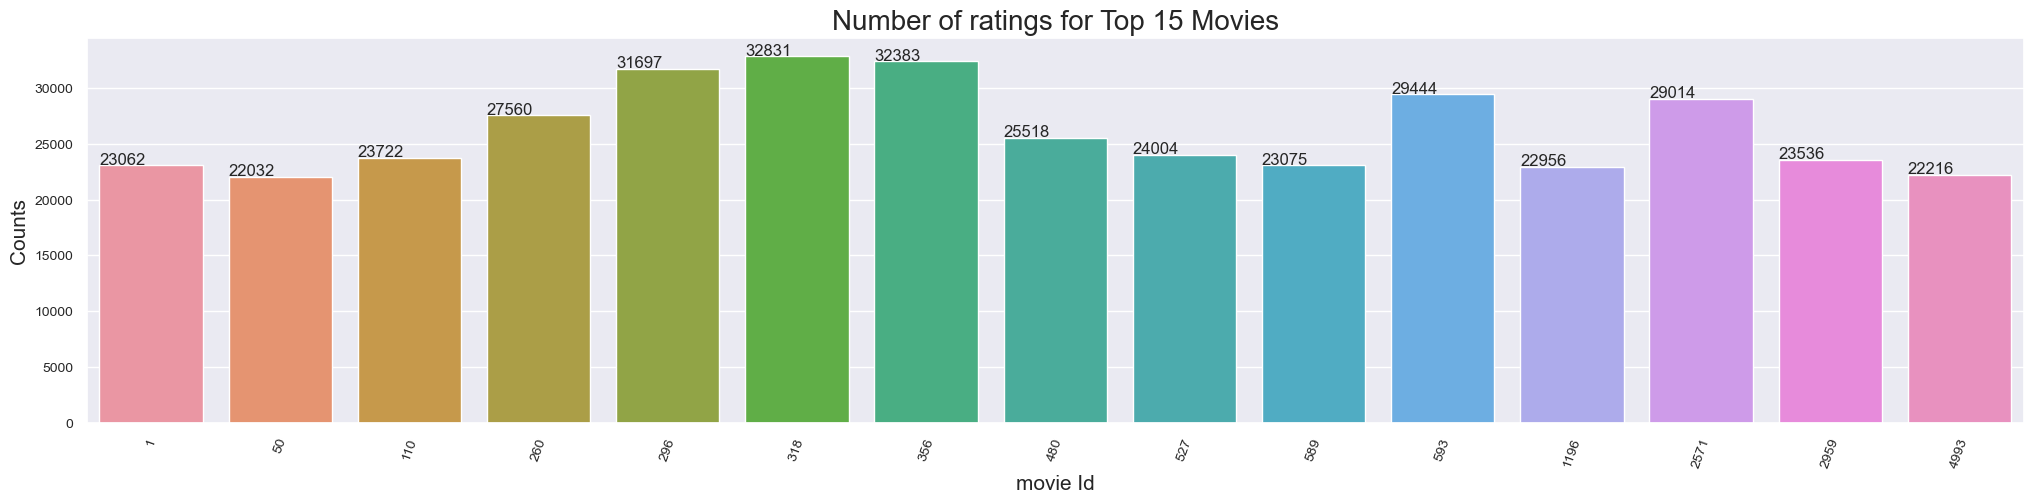

In [87]:
# Visualizing top 5 movies heavily rated movies.

# Sort the DataFrame by 'rating' in descending order
no_of_ratings_per_movie_sorted = no_of_ratings_per_movie[:15].sort_values(by='rating', ascending=False)

# Create the bar plot
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.barplot(x="movieId", y="rating", data=no_of_ratings_per_movie_sorted, ax=axes)
for p in axes.patches:
    axes.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()+100))

axes.set_yticklabels([int(num) for num in axes.get_yticks()])
plt.tick_params(labelsize=15)
plt.title("Number of ratings for Top 15 Movies", fontsize=20)
plt.xlabel("movie Id", fontsize=15)
plt.xticks(rotation=70, fontsize=10)
plt.ylabel("Counts", fontsize=15)
plt.yticks(fontsize=10)
plt.show()

1 - Toy Story(1995)
50 - Usual Suspects, The (1995)
110 - Braveheart (1995)
260 - Star Wars: Episode IV - A New Hope (1977)
296 - Pulp Fiction (1994)
318 - Shawshank Redemption, The (1994)
356 - Forrest Gump (1994)
480 - Jurassic Park (1993)
527 - Schindler's List (1993)
589 - Terminator 2: Judgment Day (1991)
593 - Silence of the Lambs, The (1991)
1196 - Star Wars: Episode V - The Empire Strikes Back (1980)
2571 - Matrix, The (1999)
2959 - Fight Club (1999)
4993 - Lord of the Rings: The Fellowship of the Ring, The (2001)

# Feature Engineering

in preparation of ML Algorithms, we will proceed to Feature Engineering

### Creating Matrices

We will create user-item matrix, user-user matric and item-item matrix

#### Creating User-item matrix

In [88]:
# Path for loading/saving files

file_path = r"C:\Users\27738\Music\2024 Predict"


In [89]:
# Creating/loading user-movie sparse matrix for train data

startTime = datetime.now()

print("Creating USER_ITEM sparse matrix for train Data..")

if os.path.isfile(file_path + "/TrainUISparseData.npz"):
    print("Sparse Data is already present in your disk, no need to create further. Loading Sparse Matrix")
    TrainUISparseData = sparse.load_npz(file_path + "/TrainUISparseData.npz")
    print("Shape of Train Sparse matrix = "+str(TrainUISparseData.shape))    
else:
    print("We are creating sparse data..")
    TrainUISparseData = sparse.csr_matrix((Train_Data.rating, (Train_Data.userId, Train_Data.movieId)))
    print("Creation done. Shape of sparse matrix : ", str(TrainUISparseData.shape))
    print("Saving it into disk for furthur usage.")
    sparse.save_npz(file_path + "/TrainUISparseData.npz", TrainUISparseData)
    print("Done\n")

print("Time taken : ", datetime.now() - startTime)

Creating USER_ITEM sparse matrix for train Data..
Sparse Data is already present in your disk, no need to create further. Loading Sparse Matrix
Shape of Train Sparse matrix = (162542, 209172)
Time taken :  0:00:00.780543


In [90]:
rows,cols = TrainUISparseData.shape
presentElements = TrainUISparseData.count_nonzero()

print("Sparsity Of Train matrix : {}% ".format((1-(presentElements/(rows*cols)))*100))

Sparsity Of Train matrix : 99.97058746194108% 


In [91]:
# Convert timestamps to datetime objects
Train_Data['timestamp'] = pd.to_datetime(Train_Data['timestamp'], unit='s')

# Shift timestamps by, for example, 7 days
days_to_shift = 7
Train_Data['timestamp'] = Train_Data['timestamp'] + pd.DateOffset(days=days_to_shift)

In [92]:
# Display the updated timestamps
print(Train_Data[['timestamp']])

                   timestamp
0        2018-02-18 11:53:12
1        2008-03-30 02:18:59
2        2004-02-15 04:45:39
3        2015-02-11 09:36:05
4        1996-06-05 13:17:17
...                      ...
10000033 2018-03-23 21:18:12
10000034 2001-10-15 22:42:57
10000035 2008-12-03 04:46:47
10000036 2016-11-30 17:18:50
10000037 1997-03-28 22:54:22

[10000038 rows x 1 columns]


In [132]:
rows,cols = TestUISparseData.shape
presentElements = TestUISparseData.count_nonzero()

print("Sparsity Of Test matrix : {}% ".format((1-(presentElements/(rows*cols)))*100))

Sparsity Of Test matrix : 99.98529316849252% 


Insights:

1. Shape of sparse matrix depends on highest value of userId and highest value of movieId. 
2. In the test set, there are few users from train set which is not present in the test set. 
3. For the movieId, there are less movies in the train set as compared to test set. The reason stems from the fact that we split the data based on time, and newer movies would have fallen into test set.
4. The sparsity of train set is 99.97% while the sparsity of test set is 99.98%.

In [95]:
# Function to Calculate Average rating for users or movies from User-movie sparse matrix
 
def getAverageRatings(sparseMatrix, if_user):

    #axis = 1 means rows and axis = 0 means columns 
    ax = 1 if if_user else 0

    sumOfRatings = sparseMatrix.sum(axis = ax).A1  
    noOfRatings = (sparseMatrix!=0).sum(axis = ax).A1  
    rows, cols = sparseMatrix.shape
    averageRatings = {i: sumOfRatings[i]/noOfRatings[i] for i in range(rows if if_user else cols) if noOfRatings[i]!=0}
    
    return averageRatings

In [96]:
AvgRatingUser = getAverageRatings(TrainUISparseData, True)
AvgRatingMovie = getAverageRatings(TrainUISparseData, False)
train_users = len(AvgRatingUser)
uncommonUsers = total_users - train_users
                  
print("Total no. of Users : ", total_users)
print("No. of Users in Train data : ", train_users)
print("No. of Users not present in Train data : {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))

Total no. of Users :  14592
No. of Users in Train data :  162541
No. of Users not present in Train data : -147949(-1014.0%)


In [97]:
train_movies = len(AvgRatingMovie)
uncommonMovies = total_movies - train_movies
                  
print("Total no. of Movies : ", total_movies)
print("No. of Movies in Train data : ", train_movies)
print("No. of Movies not present in Train data = {}({}%)".format(uncommonMovies, np.round((uncommonMovies/total_movies)*100), 2))

Total no. of Movies :  45251
No. of Movies in Train data :  48213
No. of Movies not present in Train data = -2962(-7.0%)


Insights:

1. Recommendation System suffers from Cold Start problems, which needs to be tackled wisely in order to design a effective system.
2. There are 45251, of the users are not present in the training data.
3. There are 2962, ie -7% of the movies which are not present in the training data.

### Creating Similarity Matrix

Computation of user-user or item-item similarity matrix is impossible if computational power is limited given we have a user vector of size 112K. There will be a matrix of size 14K x 14K. 

On the other hand, if we try to reduce the dimension say by truncated SVD then it would take even more time because truncated SVD creates dense matrix and amount of multiplication for creation of user-user similarity matrix would increase dramatically.

For the workaround, we will maintain a binary Vector for users, which tells us whether we already computed similarity for this user or not or compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.

If it is already computed, just get it directly from our datastructure, which has that information. In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ).

The datastructure to be used is purely implementation dependant.One simple method is to maintain a Dictionary Of Dictionaries:
  - key : userid
  - value : Again a dictionary
       - key : _Similar User
       - value: Similarity Value>

### Computing Item-Item Similarity Matrix

In [98]:
# Computing user-user similarity matrix for the train data
# We have 138K sized sparse vectors using which a 14K x 14K movie similarity matrix would be calculated

start = datetime.now()

if not os.path.isfile(file_path + "/m_m_similarity.npz"):
    print("Movie-Movie Similarity file does not exist in your disk. Creating Movie-Movie Similarity Matrix...")
    m_m_similarity = cosine_similarity(TrainUISparseData.T, dense_output = False)
    print("Dimension of Matrix : ", m_m_similarity.shape)
    print("Storing the Movie Similarity matrix on disk for further usage")
    sparse.save_npz(file_path + "/m_m_similarity.npz", m_m_similarity)
else:
    print("File exists in the disk. Loading the file...")
    m_m_similarity = sparse.load_npz(file_path + "/m_m_similarity.npz")
    print("Dimension of Matrix : ", m_m_similarity.shape)
    
print("The time taken to compute movie-movie similarity matrix is : ", datetime.now() - start)

File exists in the disk. Loading the file...
Dimension of Matrix :  (209172, 209172)
The time taken to compute movie-movie similarity matrix is :  0:01:11.013490


In [99]:
# Creating a function to take Movie Name and generate the top matched name and generate its N similar movies based on M-M Similary

def GetSimilarMoviesUsingMovieMovieSimilarity(movie_name, num_of_similar_movies):
    matches = process.extract(movie_name, movie_list_in_training["movieId"], scorer=fuzz.partial_ratio)
    if len(matches) == 0:
        return "No Match Found"
    movie_id = movie_list_in_training.iloc[matches[0][2]]["movieId"]
    similar_movie_id_list = np.argsort(-m_m_similarity[movie_id].toarray().ravel())[0:num_of_similar_movies+1]
    sm_df = movie_list_in_training[movie_list_in_training["movieId"].isin(similar_movie_id_list)]
    sm_df["order"] = sm_df.apply(lambda x: list(similar_movie_id_list).index(x["movieId"]), axis=1)
    
    return sm_df.sort_values("order")

### Computing User-User Similarity Matrix

In [107]:
# Getting highest uder id

row_index, col_index = TrainUISparseData.nonzero()
unique_user_id = np.unique(row_index)
print("Max User id is :", np.max(unique_user_id))

Max User id is : 162541


Time elapsed for 20 users = 0:00:19.444052sec
Time elapsed for 40 users = 0:00:36.342604sec
Time elapsed for 60 users = 0:00:53.826853sec
Time elapsed for 80 users = 0:01:11.249824sec
Time elapsed for 100 users = 0:01:28.196322sec
Average Time taken to compute similarity matrix for 1 user = 0.8737902307510376seconds


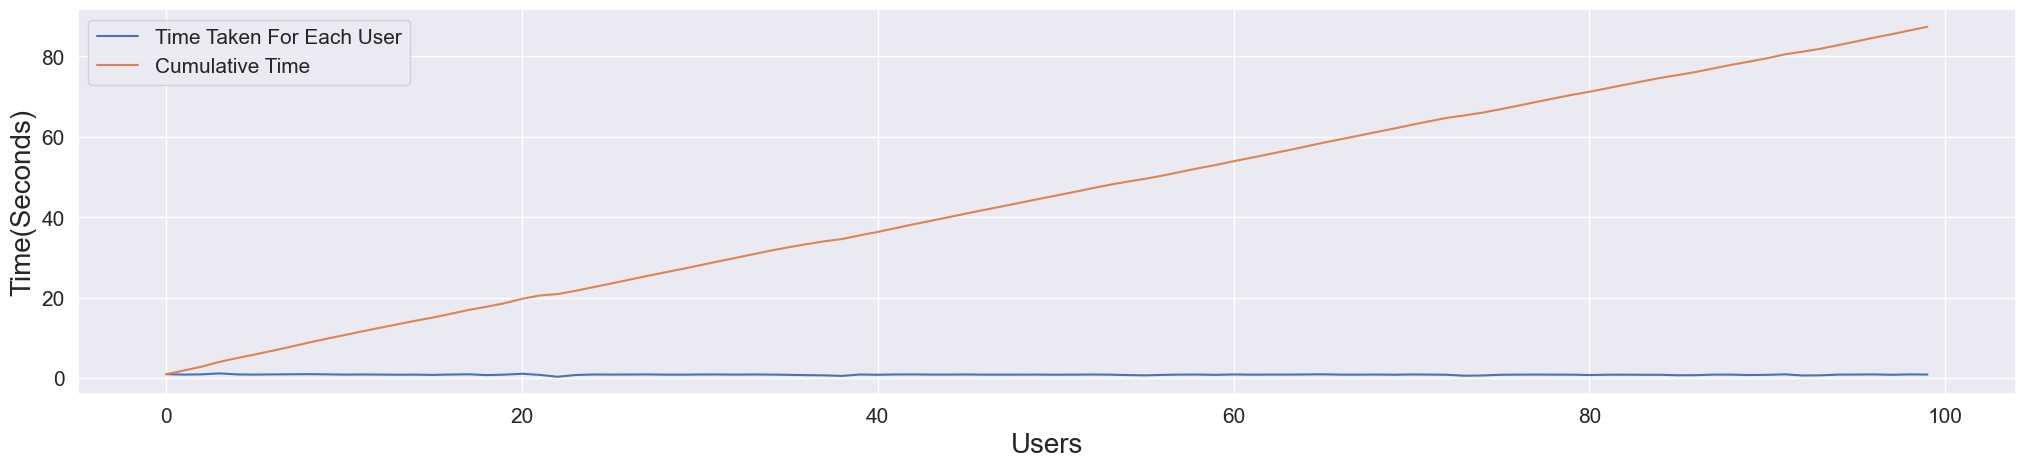

In [110]:
# Here, we are calculating user-user similarity matrix only for first 100 users in our sparse matrix. And we are calculating 
# Top 100 most similar users with them.

def getUser_UserSimilarity(sparseMatrix, top = 100):
    startTimestamp20 = datetime.now()  
    
    row_index, col_index = sparseMatrix.nonzero()
    rows = np.unique(row_index)
    similarMatrix = np.zeros(13849300).reshape(138493,100)    # 138493*100 = 13849300. As we are building similarity matrix only 
    #for top 100 most similar users.
    timeTaken = []
    howManyDone = 0
    for row in rows[:top]:
        howManyDone += 1
        startTimestamp = datetime.now().timestamp()  #it will give seconds elapsed
        sim = cosine_similarity(sparseMatrix.getrow(row), sparseMatrix).ravel()
        top100_similar_indices = sim.argsort()[-top:]
        top100_similar = sim[top100_similar_indices]
        similarMatrix[row] = top100_similar
        timeforOne = datetime.now().timestamp() - startTimestamp
        timeTaken.append(timeforOne)
        if howManyDone % 20 == 0:
            print("Time elapsed for {} users = {}sec".format(howManyDone, (datetime.now() - startTimestamp20)))
    print("Average Time taken to compute similarity matrix for 1 user = "+str(sum(timeTaken)/len(timeTaken))+"seconds")

    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (25, 5))
    plt.plot(timeTaken, label = 'Time Taken For Each User')
    plt.plot(np.cumsum(timeTaken), label='Cumulative Time')
    plt.legend(loc='upper left', fontsize = 15)
    plt.xlabel('Users', fontsize = 20)
    plt.ylabel('Time(Seconds)', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.show()
    
    return similarMatrix

simMatrix = getUser_UserSimilarity(TrainUISparseData, 100)

In [111]:
# Calculating user-user similarity only for particular users in our sparse matrix and return user_ids

def Calculate_User_User_Similarity(sparseMatrix, user_id, num_of_similar_users=10):
    
    if user_id in unique_user_id:
        # Calculating the cosine similarity for user_id with all the "userId"
        sim = cosine_similarity(sparseMatrix.getrow(user_id), sparseMatrix).ravel()
        # Sorting the indexs(user_id) based on the similarity score for all the user ids
        top_similar_user_ids = sim.argsort()[::-1]
        # Sorted the similarity values
        top_similarity_values = sim[top_similar_user_ids]

    return top_similar_user_ids[1: num_of_similar_users+1]

In [112]:
# Getting top 5 users similar to userId: 1

similar_users_1 = Calculate_User_User_Similarity(TrainUISparseData, 1, 5)
similar_users_1

array([ 32336,  66463, 158793,  72212,  71712], dtype=int64)

### Feature Extraction

Now we can start extracting meaningful features in order to prepare the data for ML algorithms.

In [113]:
# Path for saving/loading files

file_path = r"C:\Users\27738\Music\2024 Predict"

In [114]:
# Since the given dataset might not completely fit into computaton capacity that we have, we will sample the data and work it

# Function for Sampling random movies and users to reduce the size of rating matrix
def get_sample_sparse_matrix(sparseMatrix, n_users, n_movies, matrix_name):

    np.random.seed(15)   #this will give same random number everytime, without replacement
    startTime = datetime.now()

    users, movies, ratings = sparse.find(sparseMatrix)
    uniq_users = np.unique(users)
    uniq_movies = np.unique(movies)

    userS = np.random.choice(uniq_users, n_users, replace = False)
    movieS = np.random.choice(uniq_movies, n_movies, replace = False)
    mask = np.logical_and(np.isin(users, userS), np.isin(movies, movieS))
    sparse_sample = sparse.csr_matrix((ratings[mask], (users[mask], movies[mask])), shape = (max(userS)+1, max(movieS)+1))
 
    print("Sparse Matrix creation done. Saving it for later use.")
    sparse.save_npz(file_path + "/" + matrix_name, sparse_sample)
    print("Shape of Sparse Sampled Matrix = " + str(sparse_sample.shape))    
    print("Time taken : ", datetime.now() - startTime)

    return sparse_sample

In [115]:
# Creating Sample Sparse Matrix for Train Data

if not os.path.isfile(file_path + "/TrainUISparseData_Sample.npz"):
    print("Sample sparse matrix is not present in the disk. We are creating it...")
    train_sample_sparse = get_sample_sparse_matrix(TrainUISparseData, 5000, 1000, "TrainUISparseData_Sample.npz")
else:
    print("File is already present in the disk. Loading the file...")
    train_sample_sparse = sparse.load_npz(file_path + "/TrainUISparseData_Sample.npz")
    print("Shape of Train Sample Sparse Matrix = " + str(train_sample_sparse.shape))

File is already present in the disk. Loading the file...
Shape of Train Sample Sparse Matrix = (162481, 208684)


In [116]:
# Creating Sample Sparse Matrix for Test Data

if not os.path.isfile(file_path + "/TestUISparseData_Sample.npz"):
    print("Sample sparse matrix is not present in the disk. We are creating it...")
    test_sample_sparse = get_sample_sparse_matrix(TestUISparseData, 2000, 200, "TestUISparseData_Sample.npz")
else:
    print("File is already present in the disk. Loading the file...")
    test_sample_sparse = sparse.load_npz(file_path + "/TestUISparseData_Sample.npz")
    print("Shape of Test Sample Sparse Matrix = " + str(test_sample_sparse.shape))

File is already present in the disk. Loading the file...
Shape of Test Sample Sparse Matrix = (162352, 205816)


In [117]:
# Checking the shape of Training and test data

print("Shape of Train Sparse Matrix : ", train_sample_sparse.shape)
print("Shape of Test Sparse Matrix : ", test_sample_sparse.shape)

Shape of Train Sparse Matrix :  (162481, 208684)
Shape of Test Sparse Matrix :  (162352, 205816)


In [118]:
# Calculating few GlobalAverageRating, AvgMovieRating, AvgUserRating and TotalNoOfRatings

globalAvgRating = np.round((train_sample_sparse.sum()/train_sample_sparse.count_nonzero()), 2)
globalAvgMovies = getAverageRatings(train_sample_sparse, False)
globalAvgUsers = getAverageRatings(train_sample_sparse, True)
print("Global average of all movies ratings in Train Set is : ", globalAvgRating)
print("No. of ratings in the train matrix is : ", train_sample_sparse.count_nonzero())

Global average of all movies ratings in Train Set is :  3.51
No. of ratings in the train matrix is :  5441


In [119]:
# Function to extract features and create row using the sparse matrix

def CreateFeaturesForTrainData(SampledSparseData, TrainSampledSparseData):

    startTime = datetime.now()

    # Extracting userId list, movieId list and Ratings
    sample_users, sample_movies, sample_ratings = sparse.find(SampledSparseData)
    
    print("No. of rows in the returned dataset : ", len(sample_ratings))
    
    count = 0
    data = []
    
    for user, movie, rating in zip(sample_users, sample_movies, sample_ratings):

        row = list()

#----------------------------------Appending "user Id" average, "movie Id" average & global average rating-----------#
        row.append(user)  
        row.append(movie) 
        row.append(globalAvgRating) 

#----------------------------------Appending "user" average, "movie" average & rating of "user""movie"-----------#
        try:
            row.append(globalAvgUsers[user])
        except (KeyError):
            global_average_rating = globalAvgRating
            row.append(global_average_rating)
        except:
            raise
        try:            
            row.append(globalAvgMovies[movie])
        except (KeyError):
            global_average_rating = globalAvgRating
            row.append(global_average_rating)
        except:
            raise

#----------------------------------Ratings given to "movie" by top 5 similar users with "user"--------------------#
        try:
            similar_users = cosine_similarity(TrainSampledSparseData[user], TrainSampledSparseData).ravel()
            similar_users_indices = np.argsort(-similar_users)[1:]
            similar_users_ratings = TrainSampledSparseData[similar_users_indices, movie].toarray().ravel()
            top_similar_user_ratings = list(similar_users_ratings[similar_users_ratings != 0][:5])
            top_similar_user_ratings.extend([globalAvgMovies[movie]]*(5-len(top_similar_user_ratings)))
            #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "movie" average
            #rating. Let say only 3 out of 5 ratings are available then rest 2 will be "movie" average rating.
            row.extend(top_similar_user_ratings)
        #########Cold Start Problem, for a new user or a new movie######### 
        except (IndexError, KeyError):
            global_average_rating = [globalAvgRating]*5
            row.extend(global_average_rating)
        except:
            raise

#----------------------------------Ratings given by "user" to top 5 similar movies with "movie"------------------#
        try:
            similar_movies = cosine_similarity(TrainSampledSparseData[:,movie].T, TrainSampledSparseData.T).ravel()
            similar_movies_indices = np.argsort(-similar_movies)[1:]
            similar_movies_ratings = TrainSampledSparseData[user, similar_movies_indices].toarray().ravel()
            top_similar_movie_ratings = list(similar_movies_ratings[similar_movies_ratings != 0][:5])
            top_similar_movie_ratings.extend([globalAvgUsers[user]]*(5-len(top_similar_movie_ratings)))
            #above line means that if top 5 ratings are not available then rest of the ratings will be filled by "user" average
            #rating. Let say only 3 out of 5 ratings are available then rest 2 will be "user" average rating.
            row.extend(top_similar_movie_ratings)
        ########Cold Start Problem, for a new user or a new movie#########
        except (IndexError, KeyError):
            global_average_rating = [globalAvgRating] * 5
            row.extend(global_average_rating)
        except:
            raise
              
#----------------------------------Appending rating of "user""movie"-----------#
        row.append(rating)

        count += 1
        
        data.append(row)
        
        if count % 5000 == 0:
            print("Done for {}. Time elapsed: {}".format(count, (datetime.now() - startTime)))

    print("Total Time for {} rows = {}".format(len(data), (datetime.now() - startTime)))
    print("Completed..")
    return data

In [120]:
# Using sampled train data, creating Features for each row and saving it into the list

data_rows = CreateFeaturesForTrainData(train_sample_sparse, train_sample_sparse)

No. of rows in the returned dataset :  5441
Done for 5000. Time elapsed: 0:06:19.728156
Total Time for 5441 rows = 0:06:52.848622
Completed..


In [121]:
# Using sampled train data, creating Features for each row and saving it into the list

test_data_rows = CreateFeaturesForTrainData(test_sample_sparse, train_sample_sparse)

No. of rows in the returned dataset :  240
Total Time for 240 rows = 0:00:17.632801
Completed..


In [122]:
# Creating the pandas dataframe from the data rows extracted from the sparse matrix for train and test set

names = ["User_ID", "Movie_ID", "Global_Average", "User_Average", "Movie_Average", "SUR1", "SUR2", "SUR3", "SUR4", "SUR5", "SMR1", "SMR2", "SMR3", "SMR4", "SMR5", "Rating"]
train_unsupervised_data = pd.DataFrame(data_rows, columns=names)
test_unsupervised_data = pd.DataFrame(test_data_rows, columns=names)

In [123]:
# Saving the df to drive for future use

train_unsupervised_data.to_csv(file_path + "/Training_Data_For_unsupervised.csv")
test_unsupervised_data.to_csv(file_path + "/Testing_Data_For_unsupervised.csv")

In [124]:
# Loading the train and test csv files

# Path for saving/loading files
file_path = r"C:\Users\27738\Music\2024 Predict"

print("File is already present in the disk. Loading the file...")

train_unsupervised_data = pd.read_csv(file_path + "/Training_Data_For_unsupervised.csv")
train_unsupervised_data = train_unsupervised_data.drop(["Unnamed: 0"], axis=1)

test_unsupervised_data = pd.read_csv(file_path + "/Testing_Data_For_unsupervised.csv")
test_unsupervised_data = test_unsupervised_data.drop(["Unnamed: 0"], axis=1)

print("Done..")

File is already present in the disk. Loading the file...
Done..


In [125]:
# Checking the shape and first few records for train data

print("The shape of the dataframe is : ", train_unsupervised_data.shape)
print("Number of missing Values : ", train_unsupervised_data.isnull().sum().sum())
train_unsupervised_data.head()

The shape of the dataframe is :  (5441, 16)
Number of missing Values :  0


User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0       57      8949            3.51           4.5       3.646465   4.5   3.0   
1       62      3481            3.51           4.0       3.851415   4.5   3.0   
2       62      3989            3.51           4.0       3.687500   5.0   4.0   
3       62     34319            3.51           4.0       3.342857   3.5   4.0   
4       68      3481            3.51           4.5       3.851415   4.0   4.0   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  
0   4.5   4.5   4.5   4.5   4.5   4.5   4.5   4.5     4.5  
1   4.5   2.0   4.0   3.5   4.0   4.0   4.0   4.0     4.5  
2   4.5   4.0   3.5   3.5   4.5   4.0   4.0   4.0     4.0  
3   3.0   2.0   4.5   4.5   4.0   4.0   4.0   4.0     3.5  
4   2.5   4.5   4.0   4.5   4.5   4.5   4.5   4.5     4.5

In [126]:
# Checking the shape and first few records for test data

print("The shape of the dataframe is : ", test_unsupervised_data.shape)
print("Number of missing Values : ", test_unsupervised_data.isnull().sum().sum())
test_unsupervised_data.head()

The shape of the dataframe is :  (240, 16)
Number of missing Values :  0


User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0     4415     97921            3.51          3.51           3.51  3.51  3.51   
1     4512       973            3.51          3.51           3.51  3.51  3.51   
2     5361      1186            3.51          3.51           3.51  3.51  3.51   
3     5448       529            3.51          3.51           3.51  3.51  3.51   
4     5778       431            3.51          3.51           3.51  3.51  3.51   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  
0  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1  
1  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1  
2  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1  
3  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1  
4  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1

Insights:

The description of the features are stated below:
1. User_ID: ID of a this User
2. Movie_ID: ID of a this Movie
3. Global_Average: Global Average Rating
4. User_Average: Average Rating of this User
5. Movie_Average: Average Rating of this Movie
6. Ratings given to this Movie by top 5 similar users with this User: (SUR1, SUR2, SUR3, SUR4, SUR5)
11. Ratings given by this User to top 5 similar movies with this Movie: (SMR1, SMR2, SMR3, SMR4, SMR5)
16. Rating: Rating given by this User to this Movie

### Transforming Data for Surprise Models

Transforming Train Data:

We can't give raw data (movie, user, rating) to train the model in Surprise library. They have a separate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNN, Random forests,  etc.., in Surprise.

In [127]:
train_unsupervised_data[['User_ID', 'Movie_ID', 'Rating']].head(5)

User_ID  Movie_ID  Rating
0       57      8949     4.5
1       62      3481     4.5
2       62      3989     4.0
3       62     34319     3.5
4       68      3481     4.5

In [133]:
# Using Surprise library Data Structures to store train data

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_unsupervised_data[["User_ID", "Movie_ID", "Rating"]], reader)
trainset = data.build_full_trainset()

In [134]:
# Creating tuple for test set

testset = list(zip(test_unsupervised_data["User_ID"].values, test_unsupervised_data["Movie_ID"].values, test_unsupervised_data["Rating"].values))

## Model Buliding

We will try to build a model to predict the rating given by an user to a movie based on the generated fetures.


In [135]:
# Utilities to save the modelling results

error_cols = ["Model", "Train RMSE", "Train MAPE", "Test RMSE", "Test MAPE"]
error_table = pd.DataFrame(columns = error_cols)
model_train_evaluation = dict()
model_test_evaluation = dict()

In [136]:
# Function to save modelling results in a table

def make_table(model_name, rmse_train, mape_train, rmse_test, mape_test):
    global error_table
    error_table = error_table.append(pd.DataFrame([[model_name, rmse_train, mape_train, rmse_test, mape_test]], columns = error_cols))
    error_table.reset_index(drop = True, inplace = True)

In [137]:
# Function to calulate RMSE and MAPE values

def error_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(abs((y_true - y_pred)/y_true))*100
    return rmse, mape

In [138]:
# Apply Xgboost Regressor on the Train and Test Data

def train_test_xgboost(x_train, x_test, y_train, y_test, model_name):
    
    startTime = datetime.now()
    train_result = dict()
    test_result = dict()
    
    clf = xgb.XGBRegressor(n_estimators = 100, silent = False, n_jobs  = 10)
    clf.fit(x_train, y_train)
    
    print("-" * 50)
    print("TRAIN DATA")
    y_pred_train = clf.predict(x_train)
    rmse_train, mape_train = error_metrics(y_train, y_pred_train)
    print("RMSE : {}".format(rmse_train))
    print("MAPE : {}".format(mape_train))
    train_result = {"RMSE": rmse_train, "MAPE": mape_train, "Prediction": y_pred_train}
    
    print("-" * 50)
    print("TEST DATA")
    y_pred_test = clf.predict(x_test)
    rmse_test, mape_test = error_metrics(y_test, y_pred_test)
    print("RMSE : {}".format(rmse_test))
    print("MAPE : {}".format(mape_test))
    test_result = {"RMSE": rmse_test, "MAPE": mape_test, "Prediction": y_pred_test}
        
    print("-"*50)
    print("Time Taken : ", datetime.now() - startTime)
    
    plot_importance(xgb, clf)
    make_table(model_name, rmse_train, mape_train, rmse_test, mape_test)
    
    return train_result, test_result

# Function to plot feature importance for a model

def plot_importance(model, clf):
    
    sns.set(style="darkgrid")
    fig = plt.figure(figsize = (25, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    
    model.plot_importance(clf, ax = ax, height = 0.3)
    plt.xlabel("F Score", fontsize = 20)
    plt.ylabel("Features", fontsize = 20)
    plt.title("Feature Importance", fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.show()

In [139]:
# in surprise prediction of every data point is returned as dictionary like this:
# "user: 196        item: 302        r_ui = 4.00   est = 4.06   {'actual_k': 40, 'was_impossible': False}"
# In this dictionary, "r_ui" is a key for actual rating and "est" is a key for predicted rating

def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    predicted = np.array([pred.est for pred in predictions])
    return actual, predicted

def get_error(predictions):
    actual, predicted = get_ratings(predictions)
    rmse = np.sqrt(mean_squared_error(actual, predicted)) 
    mape = np.mean(abs((actual - predicted)/actual))*100
    return rmse, mape

In [140]:
my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

# Running Surprise model algorithms
def run_surprise(algo, trainset, testset, model_name):

    startTime = datetime.now()
    
    train = dict()
    test = dict()
    
    algo.fit(trainset)
    
#-----------------Evaluating Train Data------------------#
    print("-"*50)
    print("TRAIN DATA")
    train_pred = algo.test(trainset.build_testset())
    train_actual, train_predicted = get_ratings(train_pred)
    train_rmse, train_mape = get_error(train_pred)
    print("RMSE = {}".format(train_rmse))
    print("MAPE = {}".format(train_mape))
    train = {"RMSE": train_rmse, "MAPE": train_mape, "Prediction": train_predicted}
    
#-----------------Evaluating Test Data------------------#
    print("-"*50)
    print("TEST DATA")
    test_pred = algo.test(testset)
    test_actual, test_predicted = get_ratings(test_pred)
    test_rmse, test_mape = get_error(test_pred)
    print("RMSE = {}".format(test_rmse))
    print("MAPE = {}".format(test_mape))
    test = {"RMSE": test_rmse, "MAPE": test_mape, "Prediction": test_predicted}

    print("-"*50)    
    print("Time Taken = "+str(datetime.now() - startTime))
    
    make_table(model_name, train_rmse, train_mape, test_rmse, test_mape)
    
    return train, test

Train/test Splitting

We can split the data for train/test and segregate the independent and dependent features.

In [141]:
# Creating the train-test X and y variables for the ML algos

x_train = train_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
x_test = test_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
y_train = train_unsupervised_data["Rating"]
y_test = test_unsupervised_data["Rating"]

### Model Fitting

Fitting various models and checking its accuracy.

--------------------------------------------------
TRAIN DATA
RMSE : 0.15126237744494217
MAPE : 3.4508828019498914
--------------------------------------------------
TEST DATA
RMSE : 2.4892804243750315
MAPE : 248.636096517245
--------------------------------------------------
Time Taken :  0:00:00.660207


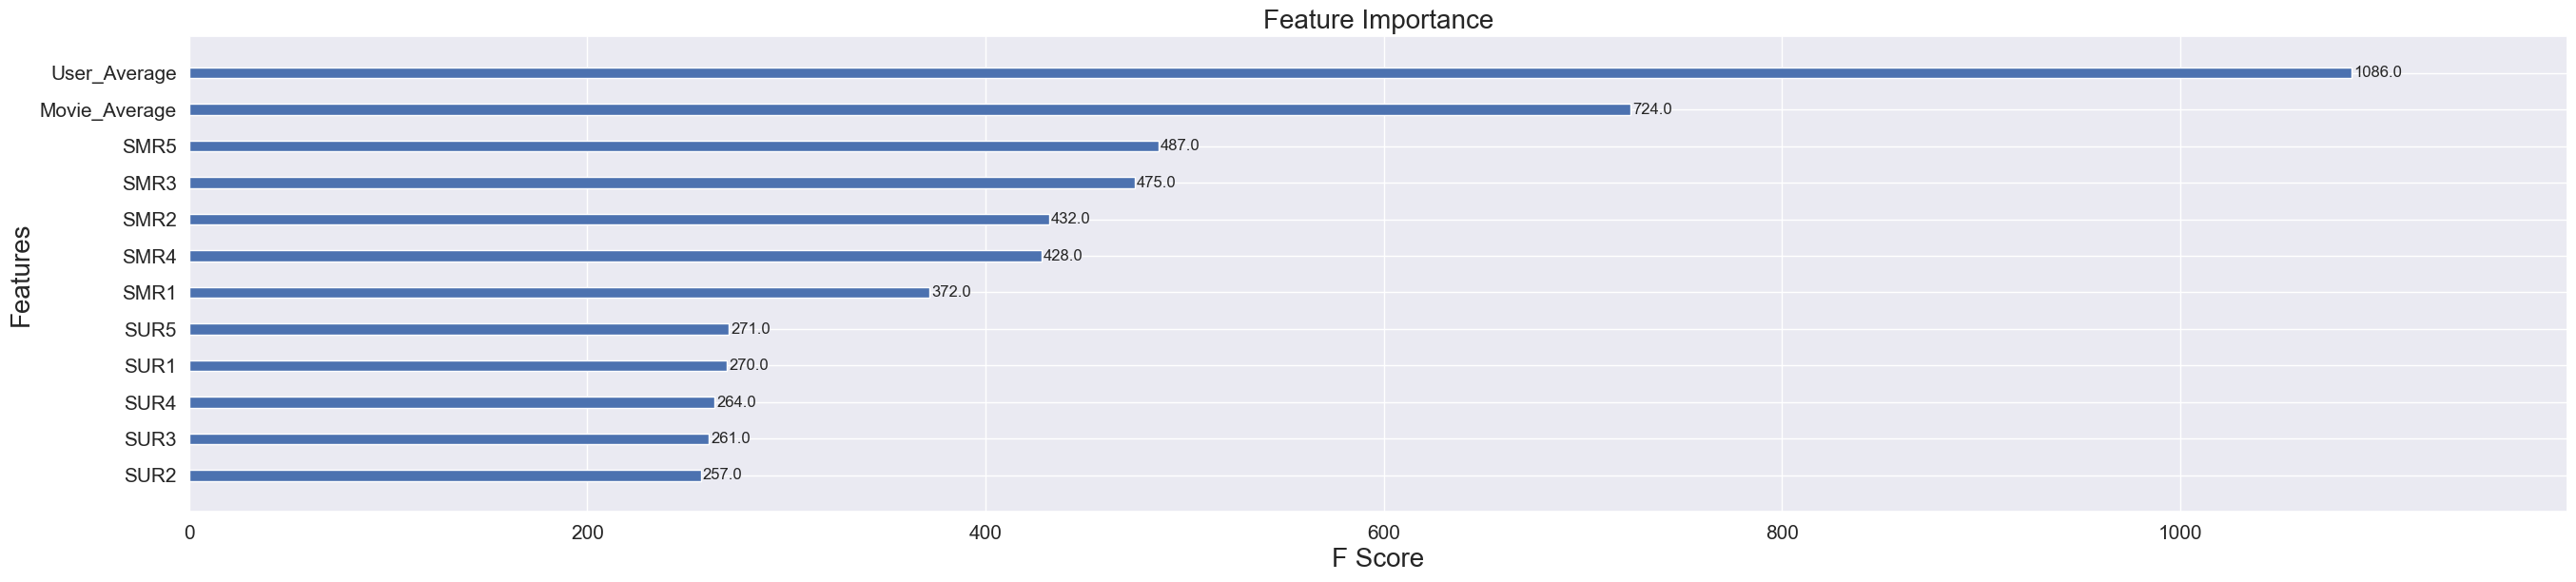

In [142]:
def make_table(model_name, rmse_train, mape_train, rmse_test, mape_test):
    global error_table
    
    # Check if error_table is already defined
    if 'error_table' not in globals():
        global error_cols
        error_cols = ['Model', 'RMSE_train', 'MAPE_train', 'RMSE_test', 'MAPE_test']
        error_table = pd.DataFrame(columns=error_cols)

    # Append to error_table
    new_data = pd.DataFrame([[model_name, rmse_train, mape_train, rmse_test, mape_test]], columns=error_cols)
    error_table = pd.concat([error_table, new_data], ignore_index=True)

    error_table.reset_index(drop=True, inplace=True)

# Training the Xgboost Regression Model on with the 13 features
train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGBoost_13")

model_train_evaluation["XGBoost_13"] = train_result
model_test_evaluation["XGBoost_13"] = test_result

Observations:

1. "User_Average" by far seems to be the most important feature for rating prediction.
2. "Movie_Average" is the second most important feature to predict the ratings.
3. The top 5 Similar User ratings and top 5 Similar Movie Ratings doesn't seems to be the effective features.

In [143]:
# DataFrame named train_unsupervised_data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(train_unsupervised_data[["User_ID", "Movie_ID", "Rating"]], reader)
trainset = data.build_full_trainset()

In [144]:
# Applying BaselineOnly from the surprise library to predict the ratings

bsl_options = {"method":"sgd", "learning_rate":0.01, "n_epochs":25}

algo = BaselineOnly(bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "BaselineOnly")


model_train_evaluation["BaselineOnly"] = train_result
model_test_evaluation["BaselineOnly"] = test_result

Estimating biases using sgd...
--------------------------------------------------
TRAIN DATA
RMSE = 0.7469142347036248
MAPE = 26.084784405192064
--------------------------------------------------
TEST DATA
RMSE = 2.5091901943422132
MAPE = 250.88322460324824
--------------------------------------------------
Time Taken = 0:00:00.158089


In [145]:
# Adding predicted ratings from Surprise BaselineOnly model to our Train and Test Dataframe

train_unsupervised_data["BaselineOnly"] = model_train_evaluation["BaselineOnly"]["Prediction"]
test_unsupervised_data["BaselineOnly"] = model_test_evaluation["BaselineOnly"]["Prediction"]

In [146]:
train_unsupervised_data.head()

User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0       57      8949            3.51           4.5       3.646465   4.5   3.0   
1       62      3481            3.51           4.0       3.851415   4.5   3.0   
2       62      3989            3.51           4.0       3.687500   5.0   4.0   
3       62     34319            3.51           4.0       3.342857   3.5   4.0   
4       68      3481            3.51           4.5       3.851415   4.0   4.0   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  BaselineOnly  
0   4.5   4.5   4.5   4.5   4.5   4.5   4.5   4.5     4.5      3.904280  
1   4.5   2.0   4.0   3.5   4.0   4.0   4.0   4.0     4.5      4.071356  
2   4.5   4.0   3.5   3.5   4.5   4.0   4.0   4.0     4.0      3.860804  
3   3.0   2.0   4.5   4.5   4.0   4.0   4.0   4.0     3.5      3.633648  
4   2.5   4.5   4.0   4.5   4.5   4.5   4.5   4.5     4.5      4.029012

In [147]:
test_unsupervised_data.head()

User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0     4415     97921            3.51          3.51           3.51  3.51  3.51   
1     4512       973            3.51          3.51           3.51  3.51  3.51   
2     5361      1186            3.51          3.51           3.51  3.51  3.51   
3     5448       529            3.51          3.51           3.51  3.51  3.51   
4     5778       431            3.51          3.51           3.51  3.51  3.51   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  BaselineOnly  
0  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973  
1  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973  
2  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973  
3  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973  
4  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973

--------------------------------------------------
TRAIN DATA
RMSE : 0.1426578357162967
MAPE : 3.297273349379834
--------------------------------------------------
TEST DATA
RMSE : 2.3868002669547175
MAPE : 238.3070876200994
--------------------------------------------------
Time Taken :  0:00:00.439025


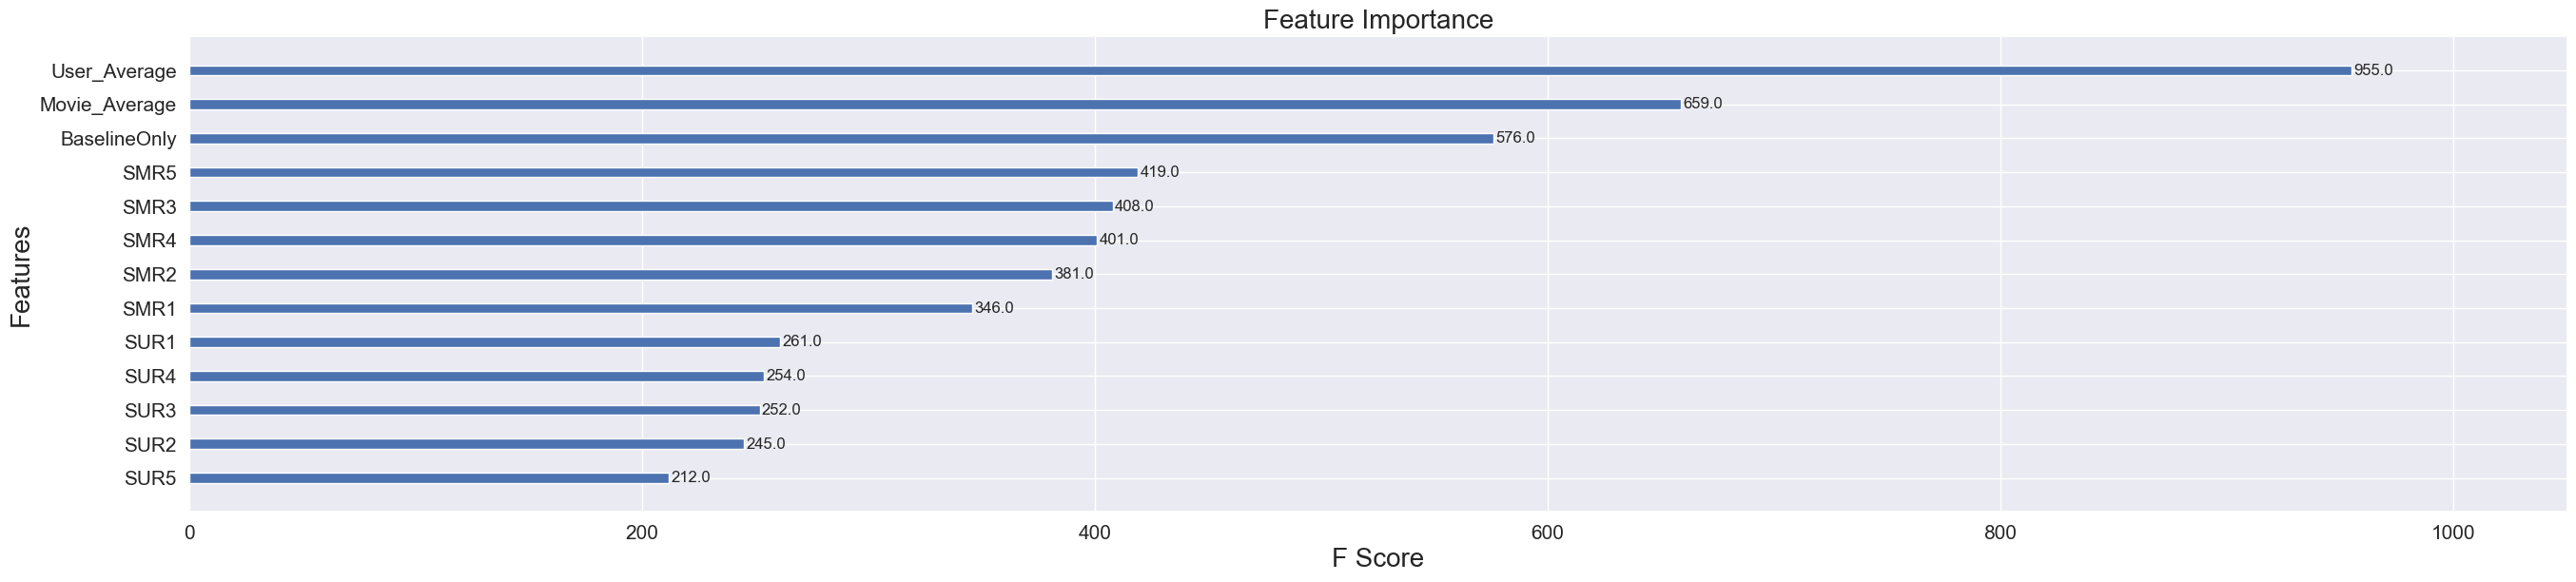

In [148]:
# Fitting the Xgboost again with new BaselineOnly feature

x_train = train_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
x_test = test_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
y_train = train_unsupervised_data["Rating"]
y_test = test_unsupervised_data["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL")

model_train_evaluation["XGB_BSL"] = train_result
model_test_evaluation["XGB_BSL"] = test_result

In [149]:
# Finding the suitable parameter for Surprise KNN-Baseline with User-User Similarity

param_grid  = {'sim_options':{'name': ["pearson_baseline"], "user_based": [True], "min_support": [2], "shrinkage": [60, 80, 80, 140]}, 'k': [5, 20, 40, 80]}
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])
# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [150]:
# Applying the KNN-Baseline with the searched parameters

sim_options = {'name':'pearson_baseline', 'user_based':True, 'min_support':2, 'shrinkage':gs.best_params['rmse']['sim_options']['shrinkage']}

bsl_options = {'method': 'sgd'} 

algo = KNNBaseline(k = gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "KNNBaseline_User")

model_train_evaluation["KNNBaseline_User"] = train_result
model_test_evaluation["KNNBaseline_User"] = test_result

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
--------------------------------------------------
TRAIN DATA
RMSE = 0.07004311790468451
MAPE = 2.2030304080388246
--------------------------------------------------
TEST DATA
RMSE = 2.507420349739236
MAPE = 250.73399378431444
--------------------------------------------------
Time Taken = 0:00:01.626748


In [151]:
# Similarly finding best parameters for Surprise KNN-Baseline with Item-Item Similarity

param_grid  = {'sim_options':{'name': ["pearson_baseline"], "user_based": [False], "min_support": [2], "shrinkage": [60, 80, 80, 140]}, 'k': [5, 20, 40, 80]}

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [152]:
# Assuming gs.best_params looks like {'rmse': {'k': 10, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'shrinkage': 10}}}
shrinkage_param = gs.best_params['rmse']['sim_options']['shrinkage']

# Applying KNN-Baseline with best parameters searched

sim_options = {'name':'pearson_baseline', 'user_based':False, 'min_support':2, 'shrinkage':gs.best_params['rmse']['sim_options']['shrinkage']}

bsl_options = {'method': 'sgd'} 

algo = KNNBaseline(k = gs.best_params['rmse']['k'], sim_options = sim_options, bsl_options=bsl_options)

train_result, test_result = run_surprise(algo, trainset, testset, "KNNBaseline_Item")

model_train_evaluation["KNNBaseline_Item"] = train_result
model_test_evaluation["KNNBaseline_Item"] = test_result

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
--------------------------------------------------
TRAIN DATA
RMSE = 0.07557260669380667
MAPE = 2.309239060611934
--------------------------------------------------
TEST DATA
RMSE = 2.507420349739236
MAPE = 250.73399378431444
--------------------------------------------------
Time Taken = 0:00:00.251568


In [153]:
# Assuming you have trained the KNNBaseline model and obtained train_result
model_train_evaluation["KNNBaseline_User"] = train_result

# Addding the KNNBaseline features to the train and test dataset

train_unsupervised_data["KNNBaseline_User"] = model_train_evaluation["KNNBaseline_User"]["Prediction"]
train_unsupervised_data["KNNBaseline_Item"] = model_train_evaluation["KNNBaseline_Item"]["Prediction"]

test_unsupervised_data["KNNBaseline_User"] = model_test_evaluation["KNNBaseline_User"]["Prediction"]
test_unsupervised_data["KNNBaseline_Item"] = model_test_evaluation["KNNBaseline_Item"]["Prediction"]

In [154]:
train_unsupervised_data.head()

User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0       57      8949            3.51           4.5       3.646465   4.5   3.0   
1       62      3481            3.51           4.0       3.851415   4.5   3.0   
2       62      3989            3.51           4.0       3.687500   5.0   4.0   
3       62     34319            3.51           4.0       3.342857   3.5   4.0   
4       68      3481            3.51           4.5       3.851415   4.0   4.0   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  BaselineOnly  \
0   4.5   4.5   4.5   4.5   4.5   4.5   4.5   4.5     4.5      3.904280   
1   4.5   2.0   4.0   3.5   4.0   4.0   4.0   4.0     4.5      4.071356   
2   4.5   4.0   3.5   3.5   4.5   4.0   4.0   4.0     4.0      3.860804   
3   3.0   2.0   4.5   4.5   4.0   4.0   4.0   4.0     3.5      3.633648   
4   2.5   4.5   4.0   4.5   4.5   4.5   4.5   4.5     4.5      4.029012   

   KNNBaseline_User  KNNBaseline_Item  
0               4.5               4.5  
1               4.5               4.5  
2               4.0               4.0  
3               3.5               3.5  
4               4.5               4.5

In [155]:
test_unsupervised_data.head()

User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0     4415     97921            3.51          3.51           3.51  3.51  3.51   
1     4512       973            3.51          3.51           3.51  3.51  3.51   
2     5361      1186            3.51          3.51           3.51  3.51  3.51   
3     5448       529            3.51          3.51           3.51  3.51  3.51   
4     5778       431            3.51          3.51           3.51  3.51  3.51   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  BaselineOnly  \
0  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
1  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
2  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
3  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
4  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   

   KNNBaseline_User  KNNBaseline_Item  
0          3.505973          3.505973  
1          3.505973          3.505973  
2          3.505973          3.505973  
3          3.505973          3.505973  
4          3.505973          3.505973

--------------------------------------------------
TRAIN DATA
RMSE : 0.0011464234140935094
MAPE : 0.025483215682153917
--------------------------------------------------
TEST DATA
RMSE : 2.5001803716624025
MAPE : 250.01803567012152
--------------------------------------------------
Time Taken :  0:00:00.441519


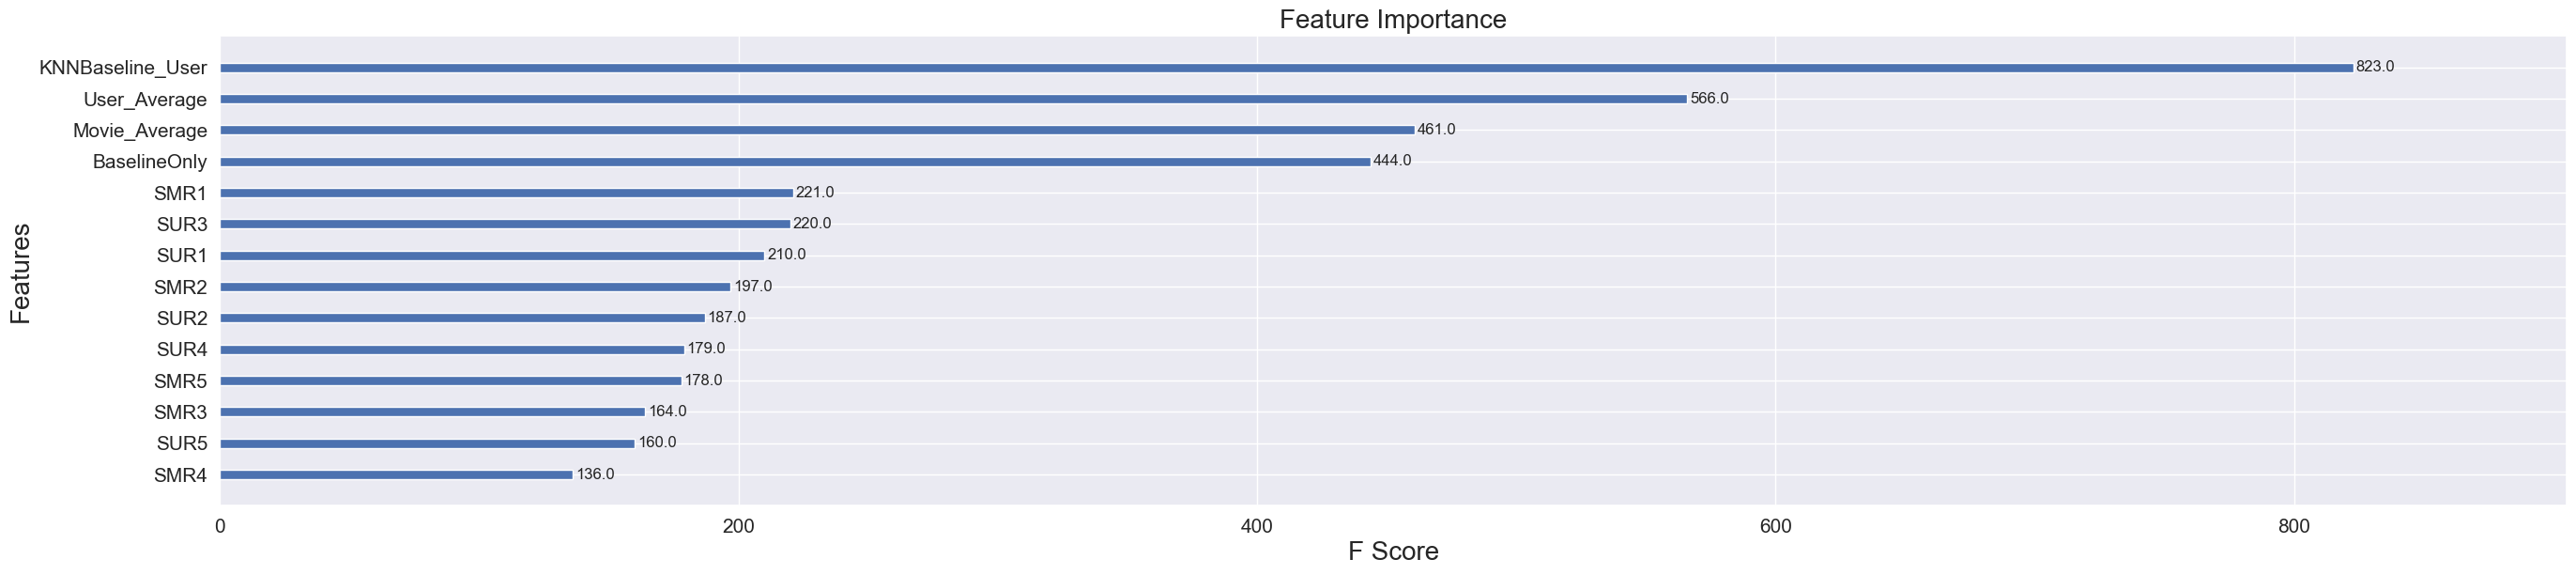

In [156]:
# Applying Xgboost with the KNN-Baseline newly added features

x_train = train_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
x_test = test_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

y_train = train_unsupervised_data["Rating"]
y_test = test_unsupervised_data["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL_KNN")

model_train_evaluation["XGB_BSL_KNN"] = train_result
model_test_evaluation["XGB_BSL_KNN"] = test_result

Insights:

1. The KNN Baseline features are effective predictor.

In [157]:
# Appling the SlopeOne algorithm from the Surprise library

so = SlopeOne()

train_result, test_result = run_surprise(so, trainset, testset, "SlopeOne")

model_train_evaluation["SlopeOne"] = train_result
model_test_evaluation["SlopeOne"] = test_result

--------------------------------------------------
TRAIN DATA
RMSE = 0.4380763647313074
MAPE = 12.00073358296821
--------------------------------------------------
TEST DATA
RMSE = 2.5059731666972986
MAPE = 250.59731666972976
--------------------------------------------------
Time Taken = 0:00:00.165001


In [158]:
# Adding the SlopOne predictions to the train and test datasets

train_unsupervised_data["SlopeOne"] = model_train_evaluation["SlopeOne"]["Prediction"]
train_unsupervised_data["SlopeOne"] = model_train_evaluation["SlopeOne"]["Prediction"]

test_unsupervised_data["SlopeOne"] = model_test_evaluation["SlopeOne"]["Prediction"]
test_unsupervised_data["SlopeOne"] = model_test_evaluation["SlopeOne"]["Prediction"]

In [159]:
# Matrix Factorization using SVD from Surprise Library

# here, n_factors is the equivalent to dimension 'd' when matrix 'A'
# is broken into 'b' and 'c'. So, matrix 'A' will be of dimension n*m. So, matrices 'b' and 'c' will be of dimension n*d and m*d.
param_grid  = {'n_factors': [5,7,10,15,20,25,35,50,70,90]}   

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9437156135228867
{'n_factors': 5}


In [160]:
# Applying SVD with best parameters

algo = SVD(n_factors = gs.best_params['rmse']['n_factors'], biased=True, verbose=True)

train_result, test_result = run_surprise(algo, trainset, testset, "SVD")

model_train_evaluation["SVD"] = train_result
model_test_evaluation["SVD"] = test_result

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.8240809804700502
MAPE = 29.404791677453478
--------------------------------------------------
TEST DATA
RMSE = 2.5073961735898873
MAPE = 250.7315030409777
--------------------------------------------------
Time Taken = 0:00:00.173647


In [161]:
# Matrix Factorization SVDpp with implicit feedback

# Hyper-parameter optimization for SVDpp
param_grid = {'n_factors': [10, 30, 50, 80, 100], 'lr_all': [0.002, 0.006, 0.018, 0.054, 0.10]}

gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9384042996700558
{'n_factors': 10, 'lr_all': 0.006}


In [162]:
#Applying SVDpp with best parameters¶

algo = SVDpp(n_factors = gs.best_params['rmse']['n_factors'], lr_all = gs.best_params['rmse']["lr_all"], verbose=True)

train_result, test_result = run_surprise(algo, trainset, testset, "SVDpp")

model_train_evaluation["SVDpp"] = train_result
model_test_evaluation["SVDpp"] = test_result

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
--------------------------------------------------
TRAIN DATA
RMSE = 0.7598898277956646
MAPE = 26.91344672401648
--------------------------------------------------
TEST DATA
RMSE = 2.5076512947623923
MAPE = 250.75372093530447
--------------------------------------------------
Time Taken = 0:00:00.533333


In [163]:
# XGBoost 13 Features + Surprise BaselineOnly + Surprise KNN Baseline + SVD + SVDpp

train_unsupervised_data["SVD"] = model_train_evaluation["SVD"]["Prediction"]
train_unsupervised_data["SVDpp"] = model_train_evaluation["SVDpp"]["Prediction"]

test_unsupervised_data["SVD"] = model_test_evaluation["SVD"]["Prediction"]
test_unsupervised_data["SVDpp"] = model_test_evaluation["SVDpp"]["Prediction"]

In [164]:
train_unsupervised_data.head()

User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0       57      8949            3.51           4.5       3.646465   4.5   3.0   
1       62      3481            3.51           4.0       3.851415   4.5   3.0   
2       62      3989            3.51           4.0       3.687500   5.0   4.0   
3       62     34319            3.51           4.0       3.342857   3.5   4.0   
4       68      3481            3.51           4.5       3.851415   4.0   4.0   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  BaselineOnly  \
0   4.5   4.5   4.5   4.5   4.5   4.5   4.5   4.5     4.5      3.904280   
1   4.5   2.0   4.0   3.5   4.0   4.0   4.0   4.0     4.5      4.071356   
2   4.5   4.0   3.5   3.5   4.5   4.0   4.0   4.0     4.0      3.860804   
3   3.0   2.0   4.5   4.5   4.0   4.0   4.0   4.0     3.5      3.633648   
4   2.5   4.5   4.0   4.5   4.5   4.5   4.5   4.5     4.5      4.029012   

   KNNBaseline_User  KNNBaseline_Item  SlopeOne       SVD     SVDpp  
0               4.5               4.5  4.500000  3.786908  3.741589  
1               4.5               4.5  4.233333  3.987960  3.961779  
2               4.0               4.0  4.333333  3.718636  3.703553  
3               3.5               3.5  3.433333  3.434807  3.651445  
4               4.5               4.5  4.500000  3.939233  4.046992

In [165]:
test_unsupervised_data.head()

User_ID  Movie_ID  Global_Average  User_Average  Movie_Average  SUR1  SUR2  \
0     4415     97921            3.51          3.51           3.51  3.51  3.51   
1     4512       973            3.51          3.51           3.51  3.51  3.51   
2     5361      1186            3.51          3.51           3.51  3.51  3.51   
3     5448       529            3.51          3.51           3.51  3.51  3.51   
4     5778       431            3.51          3.51           3.51  3.51  3.51   

   SUR3  SUR4  SUR5  SMR1  SMR2  SMR3  SMR4  SMR5  Rating  BaselineOnly  \
0  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
1  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
2  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
3  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   
4  3.51  3.51  3.51  3.51  3.51  3.51  3.51  3.51       1      3.505973   

   KNNBaseline_User  KNNBaseline_Item  SlopeOne       SVD     SVDpp  
0          3.505973          3.505973  3.505973  3.505973  3.505973  
1          3.505973          3.505973  3.505973  3.505973  3.505973  
2          3.505973          3.505973  3.505973  3.505973  3.505973  
3          3.505973          3.505973  3.505973  3.505973  3.505973  
4          3.505973          3.505973  3.505973  3.505973  3.505973

--------------------------------------------------
TRAIN DATA
RMSE : 0.0011827554935815016
MAPE : 0.025679484140895104
--------------------------------------------------
TEST DATA
RMSE : 2.4999979010952926
MAPE : 249.99978969494504
--------------------------------------------------
Time Taken :  0:00:00.503493


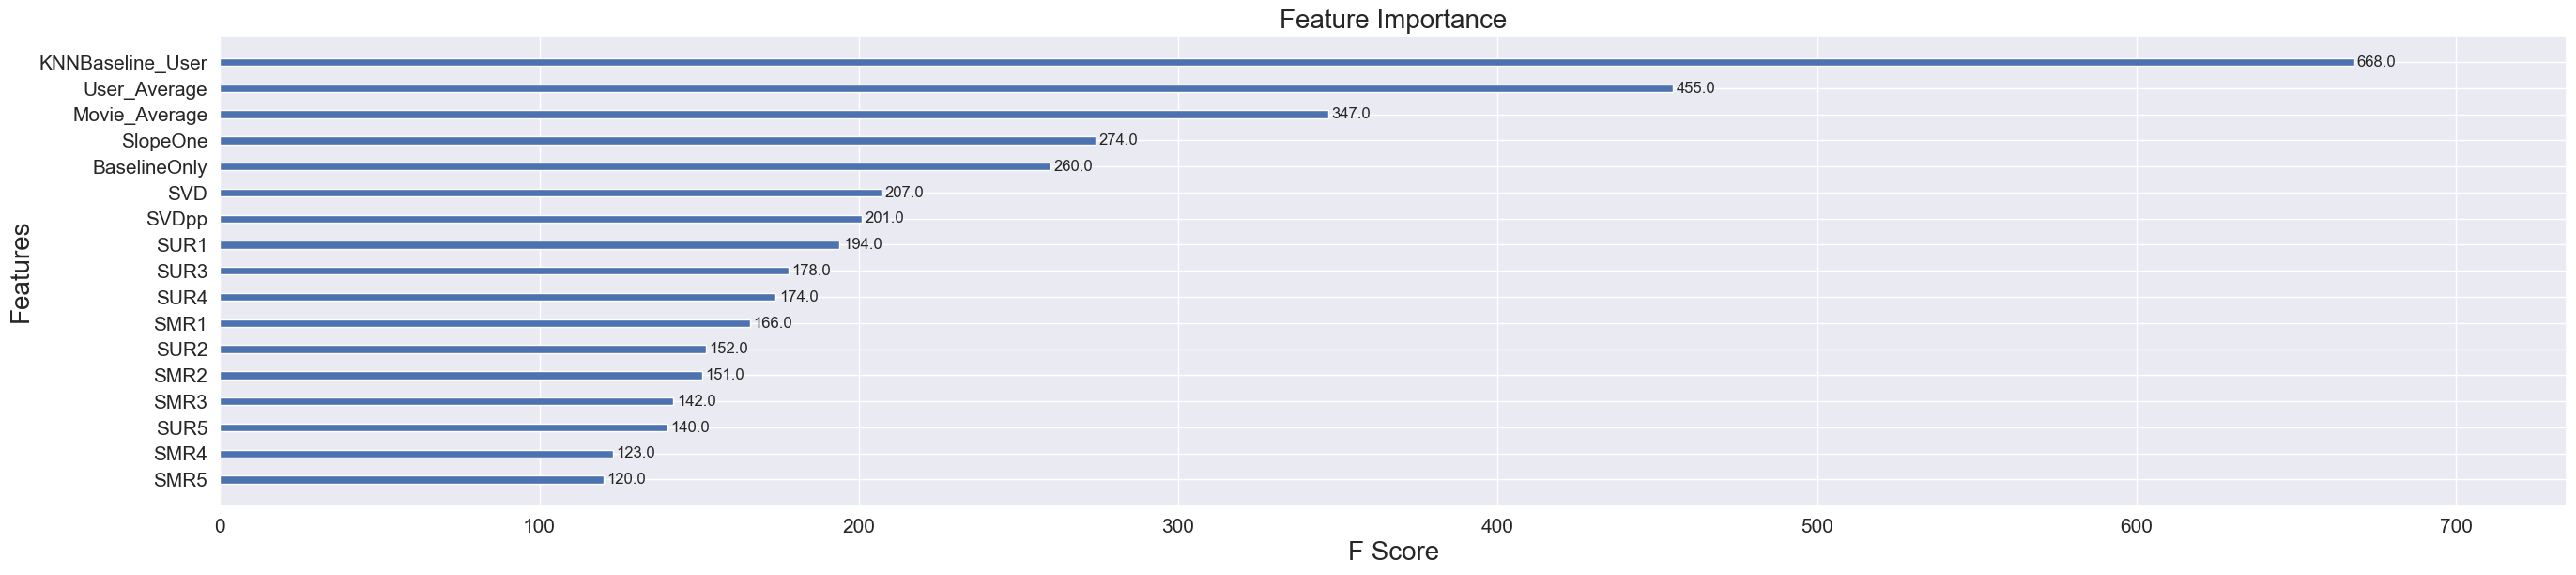

In [166]:
# Applying Xgboost on the feature set

x_train = train_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)
x_test = test_unsupervised_data.drop(["User_ID", "Movie_ID", "Rating"], axis = 1)

y_train = train_unsupervised_data["Rating"]
y_test = test_unsupervised_data["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_BSL_KNN_MF")

model_train_evaluation["XGB_BSL_KNN_MF"] = train_result
model_test_evaluation["XGB_BSL_KNN_MF"] = test_result

#Insights:

#1. KNNBaseline did best above all of the predictors

--------------------------------------------------
TRAIN DATA
RMSE : 0.00579460424075144
MAPE : 0.07908607102845971
--------------------------------------------------
TEST DATA
RMSE : 2.5000590119860617
MAPE : 250.00590066115063
--------------------------------------------------
Time Taken :  0:00:00.357019


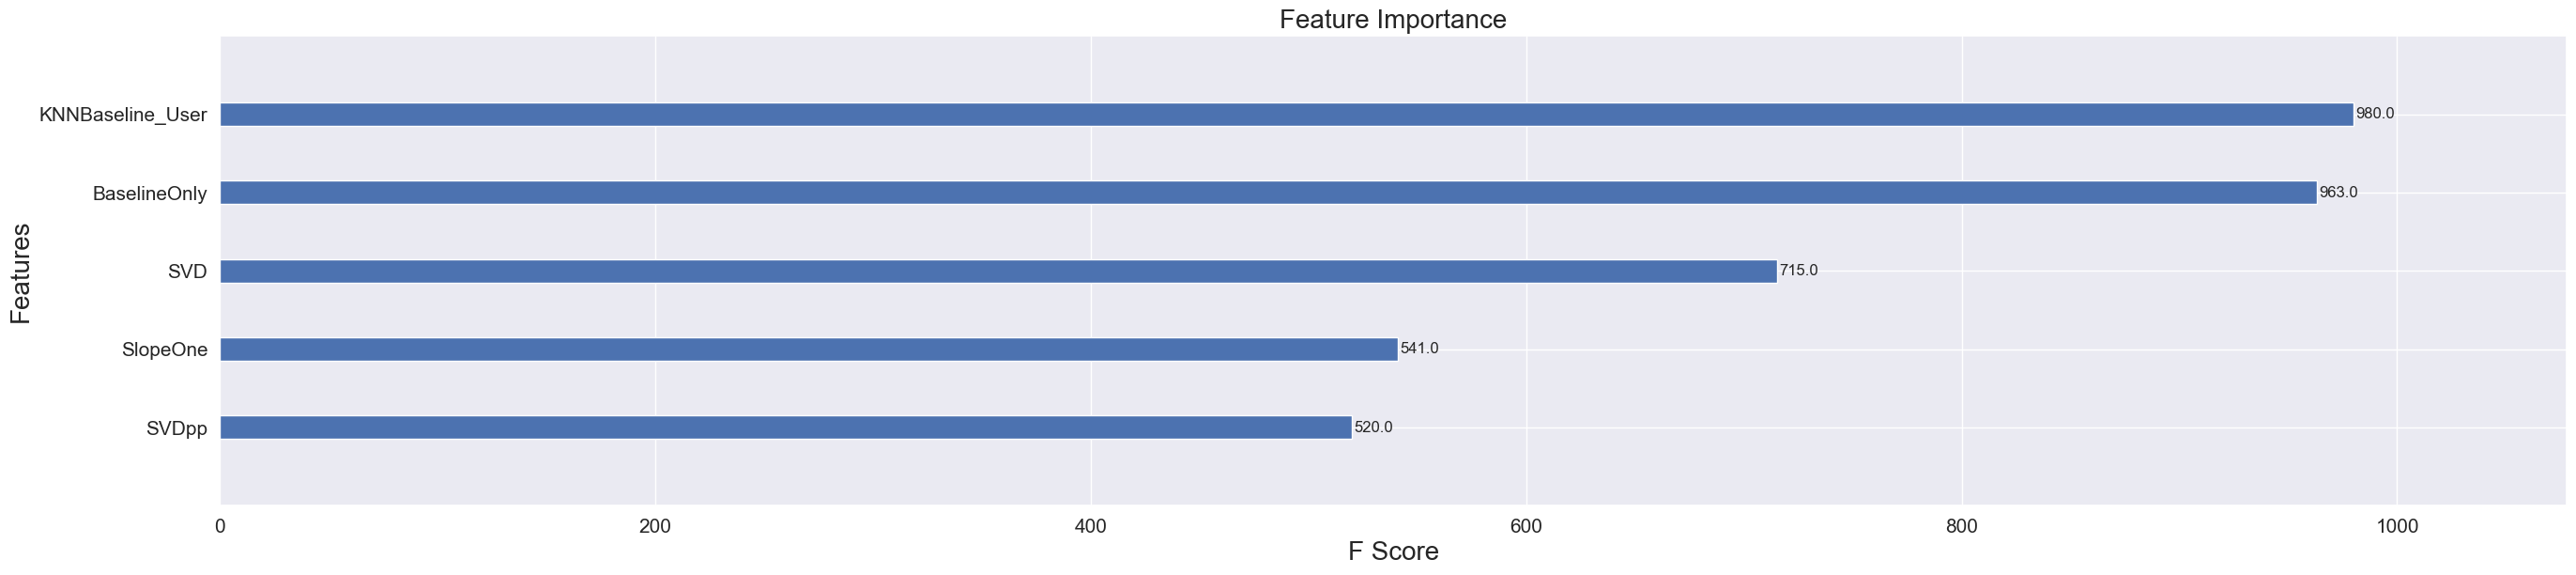

In [168]:
# Applying Xgboost with Surprise's BaselineOnly + KNN Baseline + SVD + SVDpp + SlopeOne

x_train = train_unsupervised_data[["BaselineOnly", "KNNBaseline_User", "KNNBaseline_Item", "SVD", "SVDpp", "SlopeOne"]]
x_test = test_unsupervised_data[["BaselineOnly", "KNNBaseline_User", "KNNBaseline_Item", "SVD", "SVDpp", "SlopeOne"]]

y_train = train_unsupervised_data["Rating"]
y_test = test_unsupervised_data["Rating"]

train_result, test_result = train_test_xgboost(x_train, x_test, y_train, y_test, "XGB_KNN_MF_SO")

model_train_evaluation["XGB_KNN_MF_SO"] = train_result
model_test_evaluation["XGB_KNN_MF_SO"] = test_result

Insights:

1. KNNBaseline_User seems to be the best estimator of the rating predictions.
2. SVD and Baseline Only also seems to be a important feature.
3. SlopeOne, SVDpp features are not good estimator features.

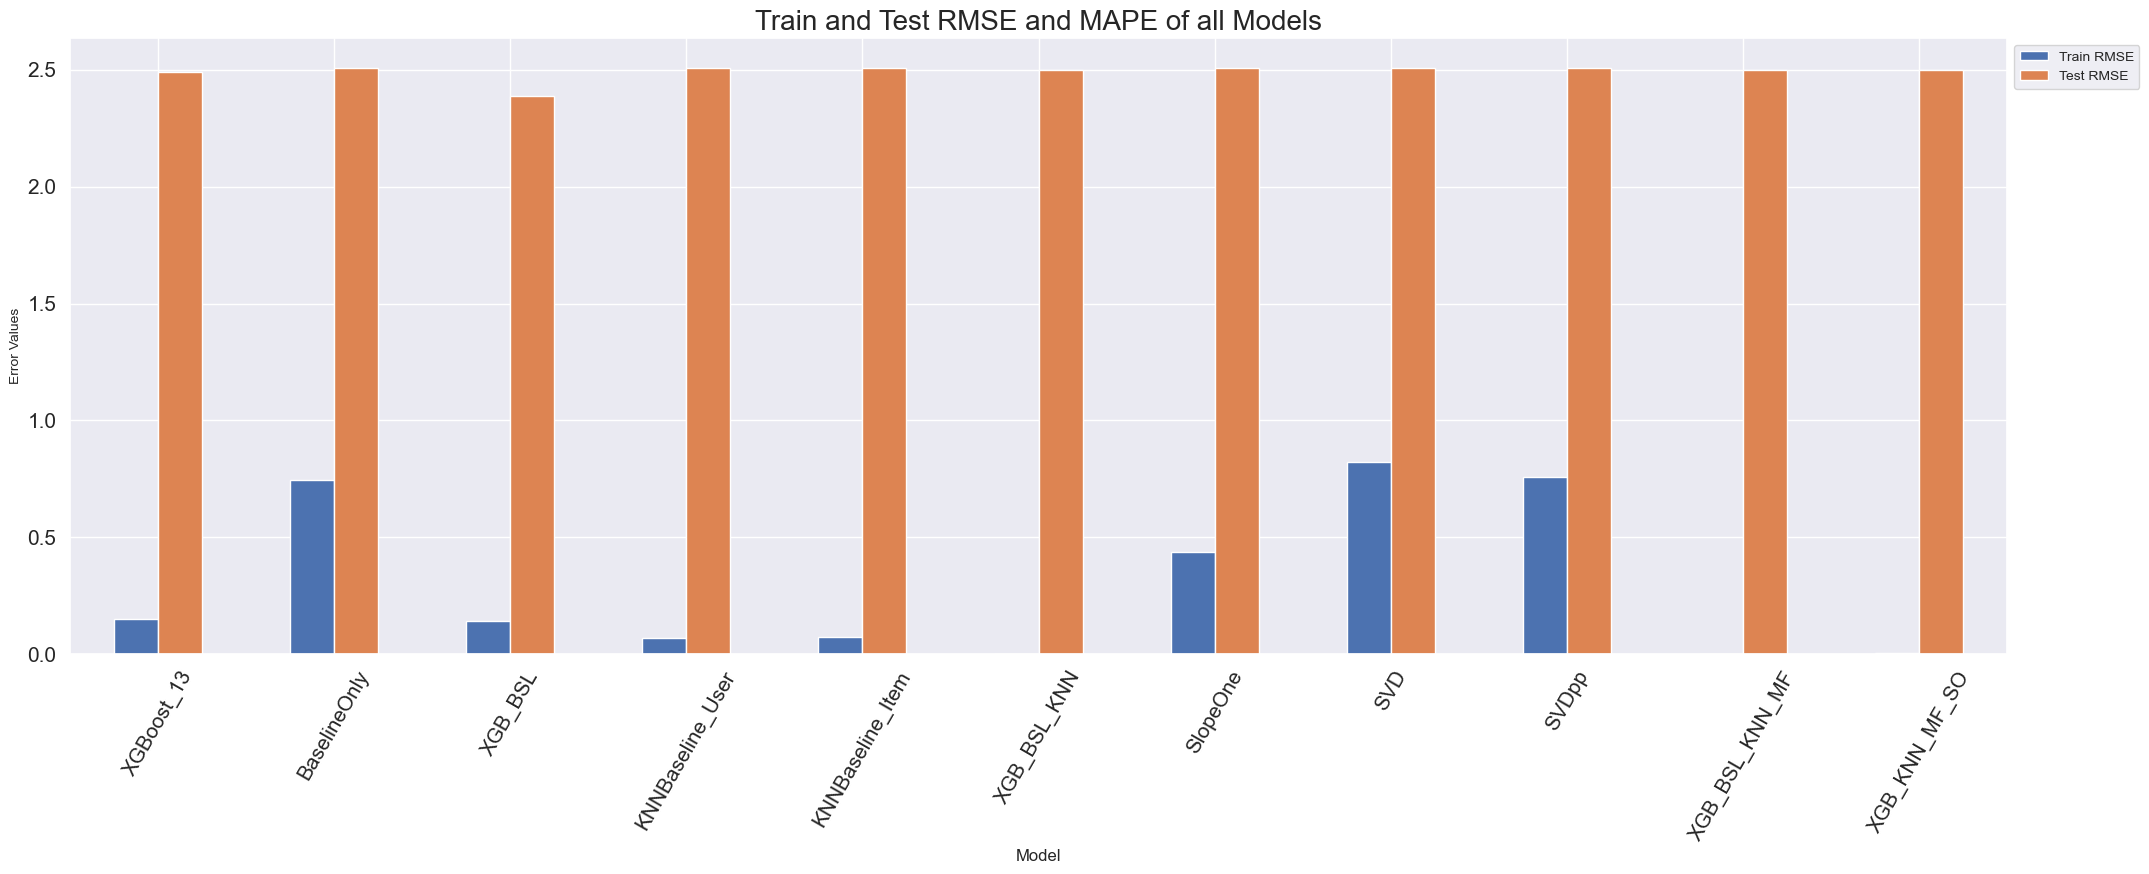

In [169]:
# Visualizing the errors of all the models we tested out

error_table2 = error_table.drop(["Train MAPE", "Test MAPE"], axis = 1)
error_table2.plot(x = "Model", kind = "bar", figsize = (25, 8), grid = True, fontsize = 15)
plt.title("Train and Test RMSE and MAPE of all Models", fontsize = 20)
plt.ylabel("Error Values", fontsize = 10)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1, 1), fontsize = 10)
plt.show()

In [170]:
# Tabular Values of Errors

error_table.drop(["Train MAPE", "Test MAPE"], axis = 1)

Model  Train RMSE  Test RMSE
0         XGBoost_13    0.151262   2.489280
1       BaselineOnly    0.746914   2.509190
2            XGB_BSL    0.142658   2.386800
3   KNNBaseline_User    0.070043   2.507420
4   KNNBaseline_Item    0.075573   2.507420
5        XGB_BSL_KNN    0.001146   2.500180
6           SlopeOne    0.438076   2.505973
7                SVD    0.824081   2.507396
8              SVDpp    0.759890   2.507651
9     XGB_BSL_KNN_MF    0.001183   2.499998
10     XGB_KNN_MF_SO    0.005795   2.500059

### Generating Recommendation for Users

We are using SVDpp to generate atmost 10 recommendated movies for various users.

In [171]:
# Testing the recommendations made by SVDpp Algorithm
from collections import defaultdict

def Get_top_n(predictions, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, mid, true_r, est, _ in predictions:
        top_n[uid].append((mid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [172]:
# Creating instance of svd_pp

svd_pp = SVDpp(n_factors = 10, lr_all = 0.006, verbose=True)
svd_pp.fit(trainset)
predictions = svd_pp.test(testset)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19


In [173]:
# Saving the training predictions

train_pred = svd_pp.test(trainset.build_anti_testset())
top_n = Get_top_n(train_pred, n=10)

In [174]:
# Print the recommended items for each user

def Generate_Recommendated_Movies(u_id, n=10):

    recommend = pd.DataFrame(top_n[u_id], columns=["Movie_Id", "Predicted_Rating"])
    recommend = recommend.merge(movies, how="inner", left_on="Movie_Id", right_on="movieId")
    recommend = recommend[["Movie_Id", "title", "genres", "Predicted_Rating"]]

    return recommend[:n]

In [175]:
# Saving the sampled user id list to help generate movies

sampled_user_id = list(top_n.keys())

In [176]:
import pandas as pd

# Replace 'train.csv' with the actual path to your train data CSV file
train_data = pd.read_csv('train.csv')
print(train_data.columns)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


 # Submission generation

In [ ]:
# Assuming `x_train` is the dataset you used for training
x_submission = x_train.drop(["User_ID", "Movie_ID", "Rating"], axis=1)

# Assuming you have the trained XGBoost model saved in `xgb_model`
# If not, you should train it or load it before making predictions

# Make predictions on the submission data
submission_predictions = xgb_model.predict(x_submission)

# Create a DataFrame with User_ID, Movie_ID, and the predicted Ratings
submission_df = pd.DataFrame({
    "User_ID": x_train["User_ID"],
    "Movie_ID": x_train["Movie_ID"],
    "Rating": submission_predictions
})

# Save the DataFrame to a CSV 
file
submission_df.to_csv("submission_predictions.csv", index=False)

## Conclusion

We delved into the realm of Recommendation Systems, gaining an understanding of their significance and the various types that are commonly utilized. We explored the application of matrix factorization as a means to bolster the effectiveness of such systems.

Our endeavor led us to construct a movie recommendation system that incorporates user-user similarity, movie-movie similarity, global averages, and matrix factorization. These fundamental concepts hold relevance not only within the realm of movie recommendations but also across a spectrum of user-item interaction systems.

Throughout our exploration, we experimented with generating recommendations based on similarity matrices and Collaborative Filtering techniques. Additionally, we endeavored to predict user ratings for movies by leveraging past rating behaviors, employing evaluation metrics such as RMSE and MAPE to gauge the accuracy of our predictions.

Undoubtedly, there remains ample room for refinement and exploration. The landscape of recommendation systems is ripe with opportunities for further experimentation, encompassing a diverse array of techniques and machine learning/deep learning algorithms.





